In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
dist_df = pd.read_csv("bulk/reproducibility_genotypes_deseq2_limma_corr_pca_distances_wSC.tsv",sep="\t")

In [4]:
meta = pd.read_csv("bulk/reproducibility_genotypes_wSC_meta.tsv",sep="\t",index_col=0)

In [5]:
dist_df.head()

Reproducibility_SC102A1_1_4  \
Reproducibility_SC102A1_1_4                      0.000000   
Reproducibility_SC102A1_1_9                    116.873449   
Reproducibility_SC102A1_3_7                     70.551807   
Reproducibility_SC102A1_2_12                   107.801528   
Reproducibility_SC102A1_3_8                    123.545867   

                              Reproducibility_SC102A1_1_9  \
Reproducibility_SC102A1_1_4                    116.873449   
Reproducibility_SC102A1_1_9                      0.000000   
Reproducibility_SC102A1_3_7                    104.729433   
Reproducibility_SC102A1_2_12                    97.324413   
Reproducibility_SC102A1_3_8                     59.754563   

                              Reproducibility_SC102A1_3_7  \
Reproducibility_SC102A1_1_4                     70.551807   
Reproducibility_SC102A1_1_9                    104.729433   
Reproducibility_SC102A1_3_7                      0.000000   
Reproducibility_SC102A1_2_12                    95.208293   
Reproducibility_SC102A1_3_8                    110.541578   

                              Reproducibility_SC102A1_2_12  \
Reproducibility_SC102A1_1_4                     107.801528   
Reproducibility_SC102A1_1_9                      97.324413   
Reproducibility_SC102A1_3_7                      95.208293   
Reproducibility_SC102A1_2_12                      0.000000   
Reproducibility_SC102A1_3_8                      96.696340   

                              Reproducibility_SC102A1_3_8  \
Reproducibility_SC102A1_1_4                    123.545867   
Reproducibility_SC102A1_1_9                     59.754563   
Reproducibility_SC102A1_3_7                    110.541578   
Reproducibility_SC102A1_2_12                    96.696340   
Reproducibility_SC102A1_3_8                      0.000000   

                              Reproducibility_SC102A1_3_6  \
Reproducibility_SC102A1_1_4                    125.967182   
Reproducibility_SC102A1_1_9                    101.866872   
Reproducibility_SC102A1_3_7                    115.929077   
Reproducibility_SC102A1_2_12                   119.264318   
Reproducibility_SC102A1_3_8                    111.101205   

                              Reproducibility_SC102A1_1_1  \
Reproducibility_SC102A1_1_4                     73.630081   
Reproducibility_SC102A1_1_9                    129.120746   
Reproducibility_SC102A1_3_7                     64.701277   
Reproducibility_SC102A1_2_12                   111.392022   
Reproducibility_SC102A1_3_8                    132.186145   

                              Reproducibility_SC102A1_2_9  \
Reproducibility_SC102A1_1_4                    121.542672   
Reproducibility_SC102A1_1_9                     50.123536   
Reproducibility_SC102A1_3_7                    109.808130   
Reproducibility_SC102A1_2_12                   101.335716   
Reproducibility_SC102A1_3_8                     65.770446   

                              Reproducibility_SC102A1_2_6  \
Reproducibility_SC102A1_1_4                    127.804397   
Reproducibility_SC102A1_1_9                    103.359579   
Reproducibility_SC102A1_3_7                    119.173275   
Reproducibility_SC102A1_2_12                   120.826640   
Reproducibility_SC102A1_3_8                    112.680330   

                              Reproducibility_SC102A1_2_1  ...      p1_D10  \
Reproducibility_SC102A1_1_4                     75.802311  ...   81.435531   
Reproducibility_SC102A1_1_9                    130.318735  ...  112.341151   
Reproducibility_SC102A1_3_7                     67.747536  ...   73.208136   
Reproducibility_SC102A1_2_12                   113.796806  ...  102.722591   
Reproducibility_SC102A1_3_8                    134.196378  ...  117.462468   

                                   p1_B4       p1_B8      p1_B10      p3_C2  \
Reproducibility_SC102A1_1_4    71.495062   65.541028   74.072325  81.918864   
Reproducibility_SC102A1_1_9   111.913365  105.179270  110.345093  78.071999   
Reproducibility

In [6]:
meta.head()

genotype  repl  sample
Reproducibility_SC102A1_1_4   SC102A1     1       4
Reproducibility_SC102A1_1_9   SC102A1     1       9
Reproducibility_SC102A1_3_7   SC102A1     3       7
Reproducibility_SC102A1_2_12  SC102A1     2      12
Reproducibility_SC102A1_3_8   SC102A1     3       8

In [7]:
#cluster samples in dendrogram?

In [8]:
distance_matrix = dist_df

In [9]:
import scipy.cluster.hierarchy as sch


In [10]:
# Convert the square distance matrix to condensed form
def square_to_condensed(square_matrix):
    # Ensure the matrix is square
    assert square_matrix.shape[0] == square_matrix.shape[1], "Distance matrix must be square"
    # Use the upper triangle indices to extract the condensed form
    triu_indices = np.triu_indices(square_matrix.shape[0], k=1)
    condensed_matrix = square_matrix[triu_indices]
    return condensed_matrix

condensed_distance_matrix = square_to_condensed(distance_matrix.values)

# Perform hierarchical clustering using the condensed distance matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')


In [11]:
vsd = pd.read_csv("bulk/reproducibility_genotypes_deseq2_vsd_wSC.tsv",sep="\t",index_col=0)

In [12]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#set colors
colors = [
    'red',
    'green',
    'blue',
    'cyan',
    'magenta',
    'gold',
    'black',
    'lightblue',
    'orange',
    'purple',
    'brown',
    'pink'
]

leaf_colors = {}
for sample,color in zip(list(set(meta['sample'])),colors):
    sample_samples = list(meta.loc[meta['sample']==sample].index)
    for ss in sample_samples:
        leaf_colors[ss] = color


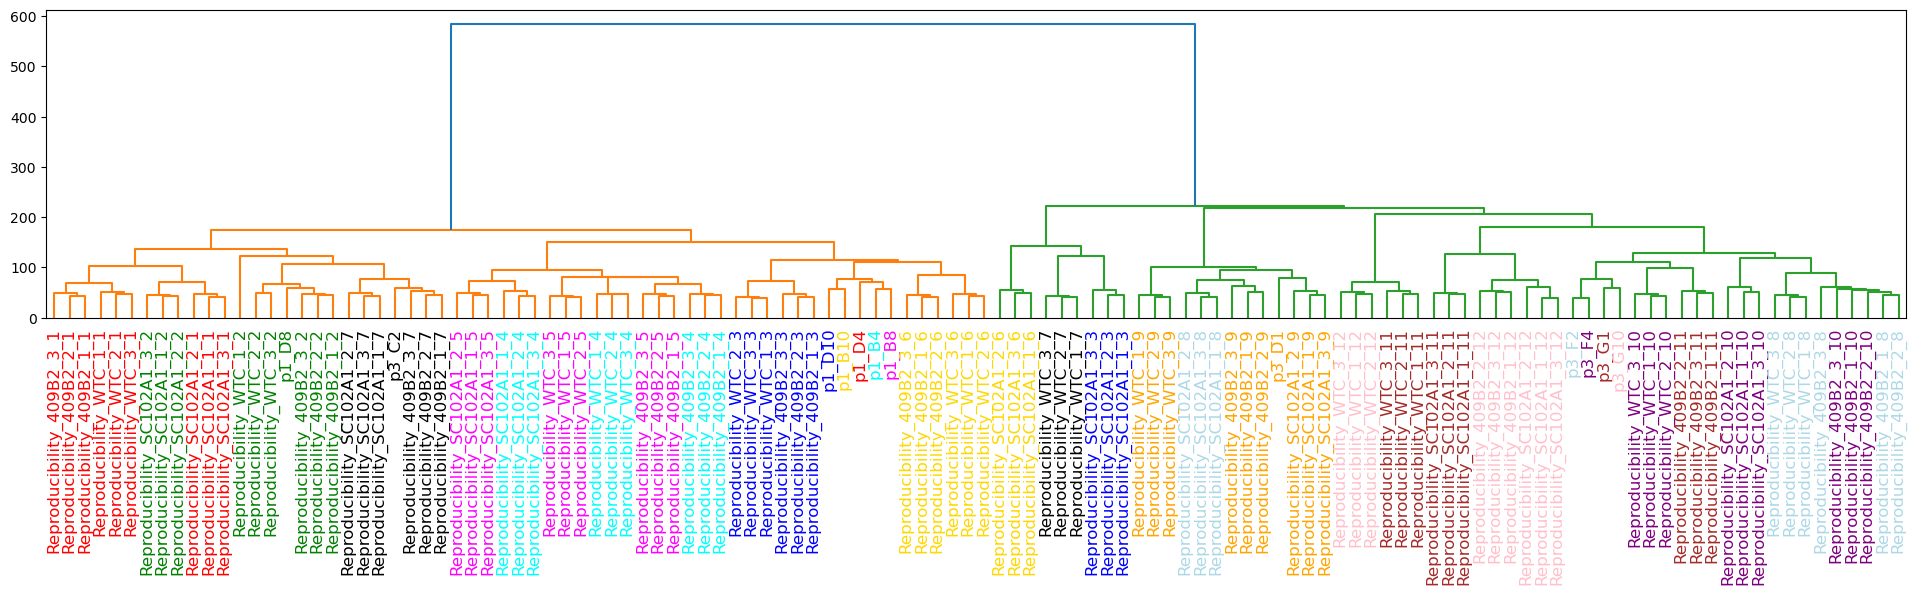

In [13]:
plt.figure(figsize=(24,4))
# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    labels=dist_df.index,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)

# Manually color the leaves
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()

dendrogram_labels = []
for label in x_labels:
    txt = label.get_text()
    color_code = leaf_colors[txt]
    label.set_color(color_code)
    dendrogram_labels.append(txt)

plt.savefig("figures/reproducibility_dendrogram_colored_by_sample.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("figures/reproducibility_dendrogram_colored_by_sample.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

plt.show()
plt.close()


In [14]:
sc_markers_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_post_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_post.head()

sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_post_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

sample species  gene_count  tscp_count  mread_count  \
01_01_02__s1  iGlut_post_p1    hg38        3542        9141        11365   
01_01_12__s1  iGlut_post_p1    hg38        1176        1940         2390   
01_01_16__s1  iGlut_post_p1    hg38        3393        8576        10612   
01_01_22__s1  iGlut_post_p1    hg38        2650        5700         7061   
01_01_55__s1  iGlut_post_p1    hg38        1970        3873         4844   

             bc1_well bc2_well bc3_well  bc1_wind  bc2_wind  ...  M_CHIR M_RA  \
01_01_02__s1       A1       A1       A2         1         1  ...     0.0    0   
01_01_12__s1       A1       A1      A12         1         1  ...     0.0    0   
01_01_16__s1       A1       A1       B4         1         1  ...     0.0    0   
01_01_22__s1       A1       A1      B10         1         1  ...     0.0    0   
01_01_55__s1       A1       A1       E7         1         1  ...     0.0    0   

              M_FGF8  M_BMP4  M_SHH  M_PM     tSNE_1     tSNE_2    umap_1  \
01_01_02__s1       0      50      0     0   0.542512  39.629030 -1.988116   
01_01_12__s1       0      50      0     0   6.332805  39.521160 -3.288275   
01_01_16__s1       0      50      0     0  28.295320  26.426134 -1.621965   
01_01_22__s1       0      50      0     0  42.816700  21.352268 -1.820428   
01_01_55__s1       0      50      0     0  19.640999  -2.478396  3.294251   

                umap_2  
01_01_02__s1  7.912624  
01_01_12__s1  8.063947  
01_01_16__s1 -1.320243  
01_01_22__s1 -2.448944  
01_01_55__s1 -1.841123  

[5 rows x 50 columns]

In [15]:
sc_markers_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_pre_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_pre.head()

sc_meta_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_pre_dr_clustered_raw_merged_meta_fixed.tsv",sep="\t",index_col=0)
sc_meta_pre.head()

sample species  gene_count  tscp_count  mread_count bc1_well  \
01_01_41__s1  iGlut_pre    hg38        1456        2184         2946       A1   
01_01_68__s1  iGlut_pre    hg38        1693        2776         3762       A1   
01_01_76__s1  iGlut_pre    hg38        1454        2196         2981       A1   
01_01_83__s1  iGlut_pre    hg38        2391        4048         5592       A1   
01_01_92__s1  iGlut_pre    hg38         769        1076         1503       A1   

             bc2_well bc3_well  bc1_wind  bc2_wind  ...  M_CHIR  M_RA  M_FGF8  \
01_01_41__s1       A1       D5         1         1  ...     0.0     0       0   
01_01_68__s1       A1       F8         1         1  ...     0.0     0       0   
01_01_76__s1       A1       G4         1         1  ...     0.0     0       0   
01_01_83__s1       A1      G11         1         1  ...     0.0     0       0   
01_01_92__s1       A1       H8         1         1  ...     0.0     0       0   

              M_BMP4  M_SHH  M_PM     tSNE_1     tSNE_2     umap_1    umap_2  
01_01_41__s1      50      0     0  10.189884  39.231434  13.276781 -0.856798  
01_01_68__s1      50      0     0  25.132082  32.402280  14.830362  5.908925  
01_01_76__s1      50      0     0   5.797632  52.208040  16.393394 -1.702099  
01_01_83__s1      50      0     0   6.855360  43.492870  13.618956 -2.668232  
01_01_92__s1      50      0     0  25.081343  29.805347  14.698254  5.868345  

[5 rows x 50 columns]

In [16]:
sc_meta_post['condition'] = sc_meta_post['AP_axis']+"_"+sc_meta_post['DV_axis']+"_"+sc_meta_post['Basal_media']
sc_meta_pre['condition'] = sc_meta_pre['AP_axis']+"_"+sc_meta_pre['DV_axis']+"_"+sc_meta_pre['Basal_media']
cond_post = sc_meta_post.groupby('condition').head(n=1)
cond_pre = sc_meta_pre.groupby('condition').head(n=1)
cond_combined = pd.concat([cond_post,cond_pre])
cond_combined.index = cond_combined['parse_id']

In [17]:
import seaborn as sns

In [18]:
meta_sorted = meta.sort_values(by=['genotype','sample'])
samples = list(set(meta_sorted['sample']))
samples = [str(x) for x in samples]

In [19]:
sample2ID = {
    '1': 'p1_D4',
    '2': 'p1_D8',
    '3': 'p1_D10',
    '4': 'p1_B4',
    '5': 'p1_B8',
    '6': 'p1_B10',
    '7': 'p3_C2',
    '8': 'p3_F2',
    '9': 'p3_D1',
    '10': 'p3_F4',
    '11': 'p3_G1',
    '12': 'p3_G10'}


In [20]:
sc_markers_pre

scores  pvals  pvals_adj  logfoldchanges  cluster  fcluster  \
BOC       69.443950    0.0        0.0        2.953943        0         0   
MIR99AHG  60.817980    0.0        0.0        2.048046        0         0   
HOXD3     60.788260    0.0        0.0        4.283298        0         0   
RFX4      54.793470    0.0        0.0        2.647338        0         0   
PRTG      54.129130    0.0        0.0        1.525106        0         0   
...             ...    ...        ...             ...      ...       ...   
SDK1     -42.162025    0.0        0.0       -1.438273      114       114   
FAT3     -43.148895    0.0        0.0       -1.386530      114       114   
GPC6     -44.435505    0.0        0.0       -1.201998      114       114   
EGFEM1P  -46.812770    0.0        0.0       -1.773386      114       114   
NAV2     -50.969160    0.0        0.0       -2.611532      114       114   

          cluster_old  
BOC                 0  
MIR99AHG            0  
HOXD3               0  
RFX4                0  
PRTG                0  
...               ...  
SDK1              114  
FAT3              114  
GPC6              114  
EGFEM1P           114  
NAV2              114  

[7211650 rows x 7 columns]

In [21]:
all_markers_plot = []
all_markers_plot_post = []
all_markers_plot_pre = []
for sample in samples:
    sample_ID = sample2ID[sample]
    if 'p1' in sample_ID:
        sample_clusters = list(sc_meta_post.loc[sc_meta_post['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)

        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_post.loc[sc_markers_post['cluster_old']==cluster].index[0:10])
            all_markers_plot = all_markers_plot + cluster_markers
            all_markers_plot_post = all_markers_plot_post + cluster_markers            
    if 'p3' in sample_ID:
        sample_clusters = list(sc_meta_pre.loc[sc_meta_pre['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)
        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_pre.loc[sc_markers_pre['cluster_old']==cluster].index[0:10])
            all_markers_plot = all_markers_plot + cluster_markers
            all_markers_plot_pre = all_markers_plot_pre + cluster_markers

In [22]:
all_markers_plot = [x for x in all_markers_plot if x in vsd.index]

In [23]:
len(all_markers_plot)

360

In [24]:
meta_sorted_SC = meta_sorted.loc[meta_sorted['genotype']=='single_cell']

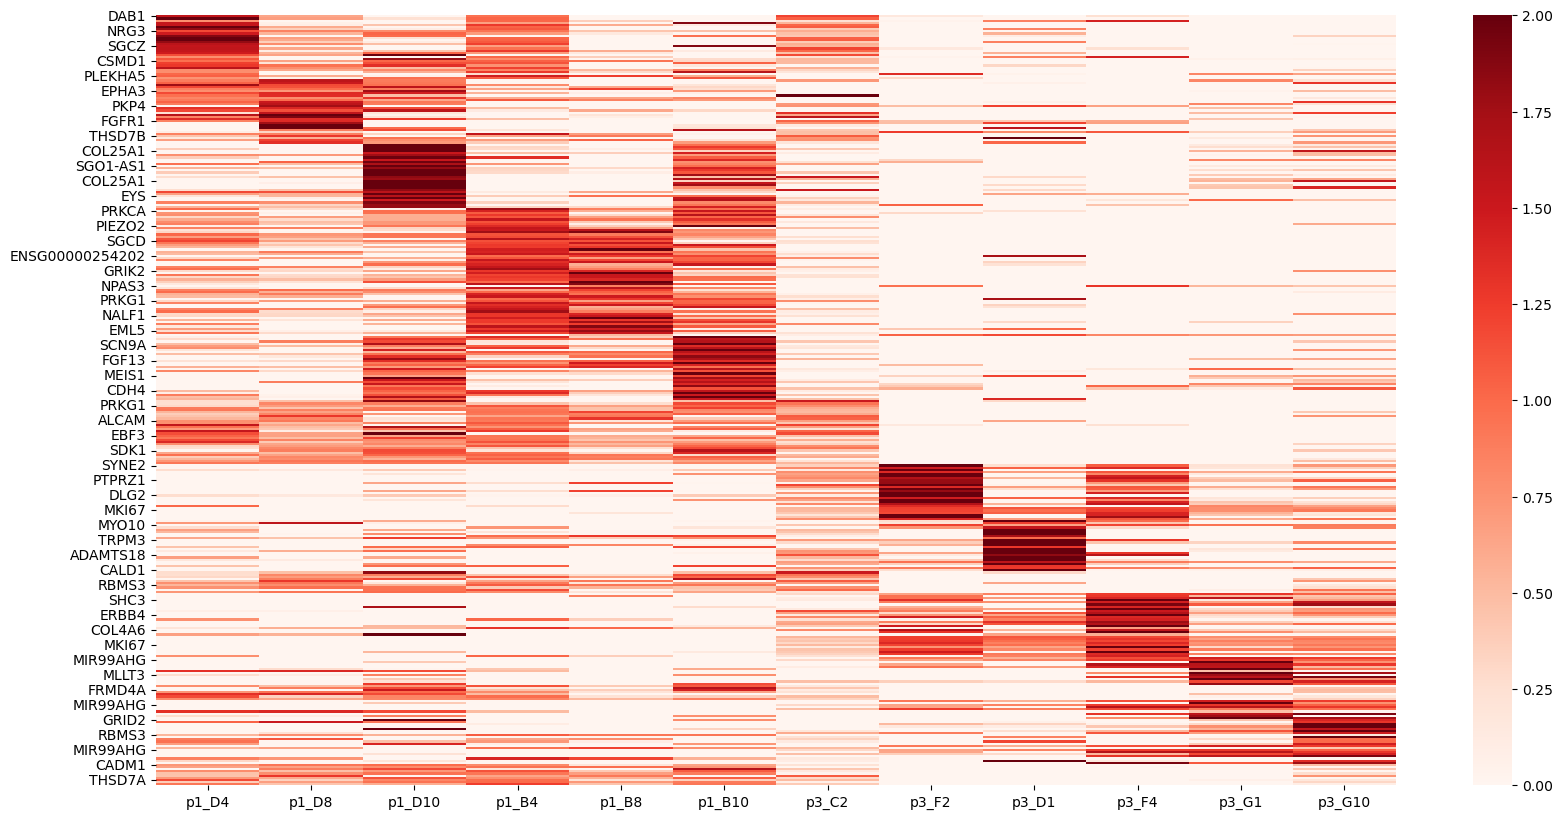

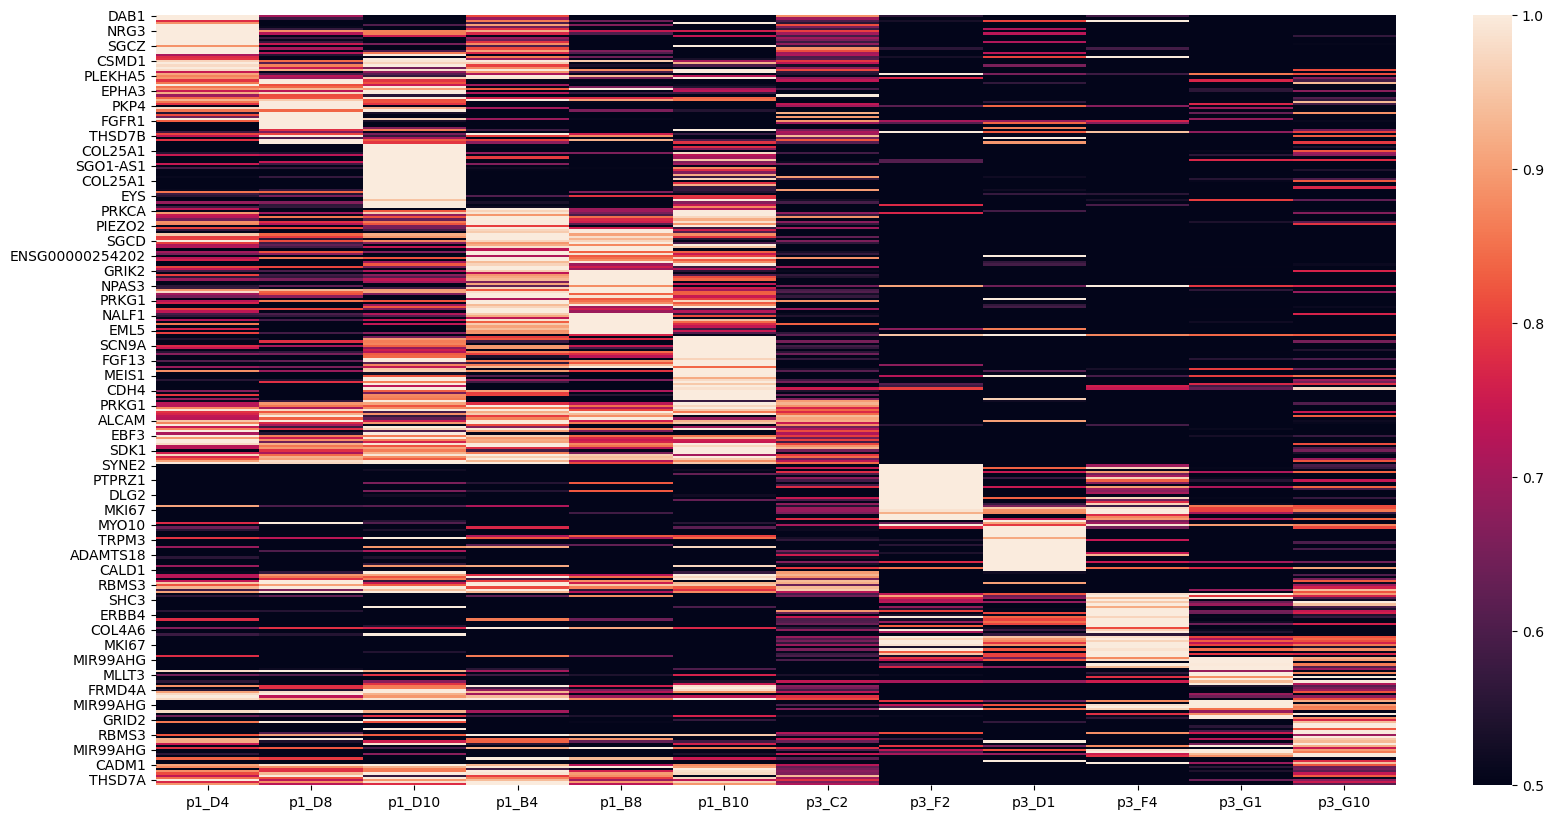

In [25]:
sample_markers_all = all_markers_plot
dendrogram_labels = meta_sorted_SC.index

vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

plt.figure(figsize=(20,10))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Reds')
plt.show()
plt.close()

vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
vsd_plot_minmax = vsd_plot_minmax.T
plt.figure(figsize=(20,10))
sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1)
plt.show()
plt.close()

SC102A1


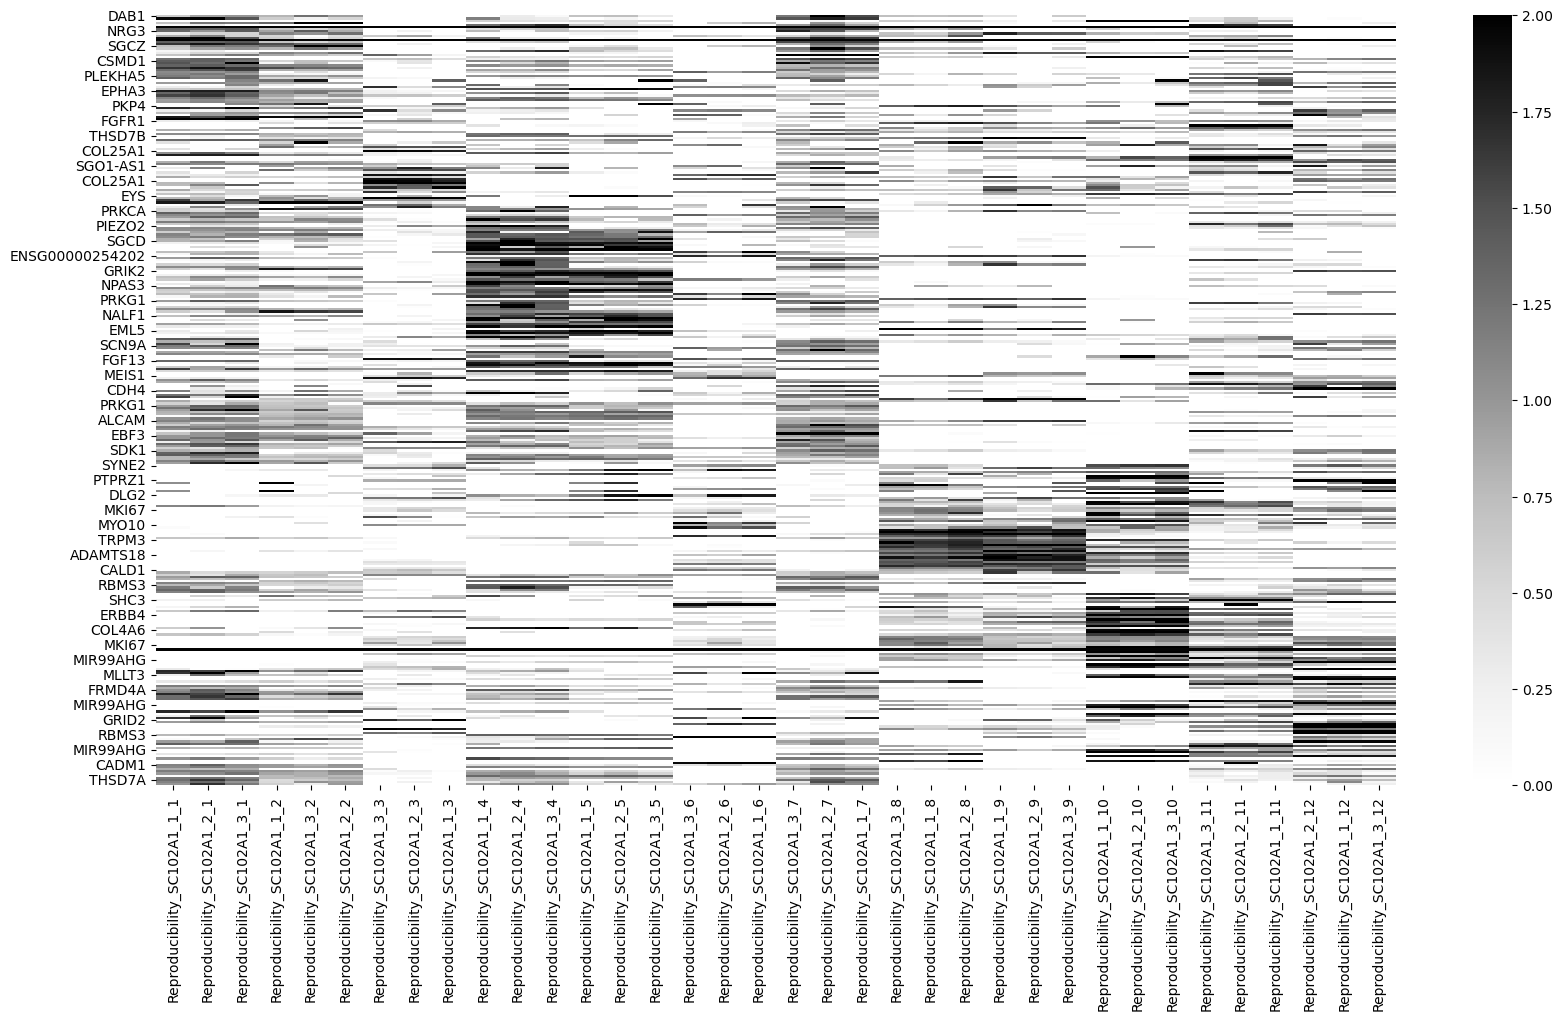

409B2


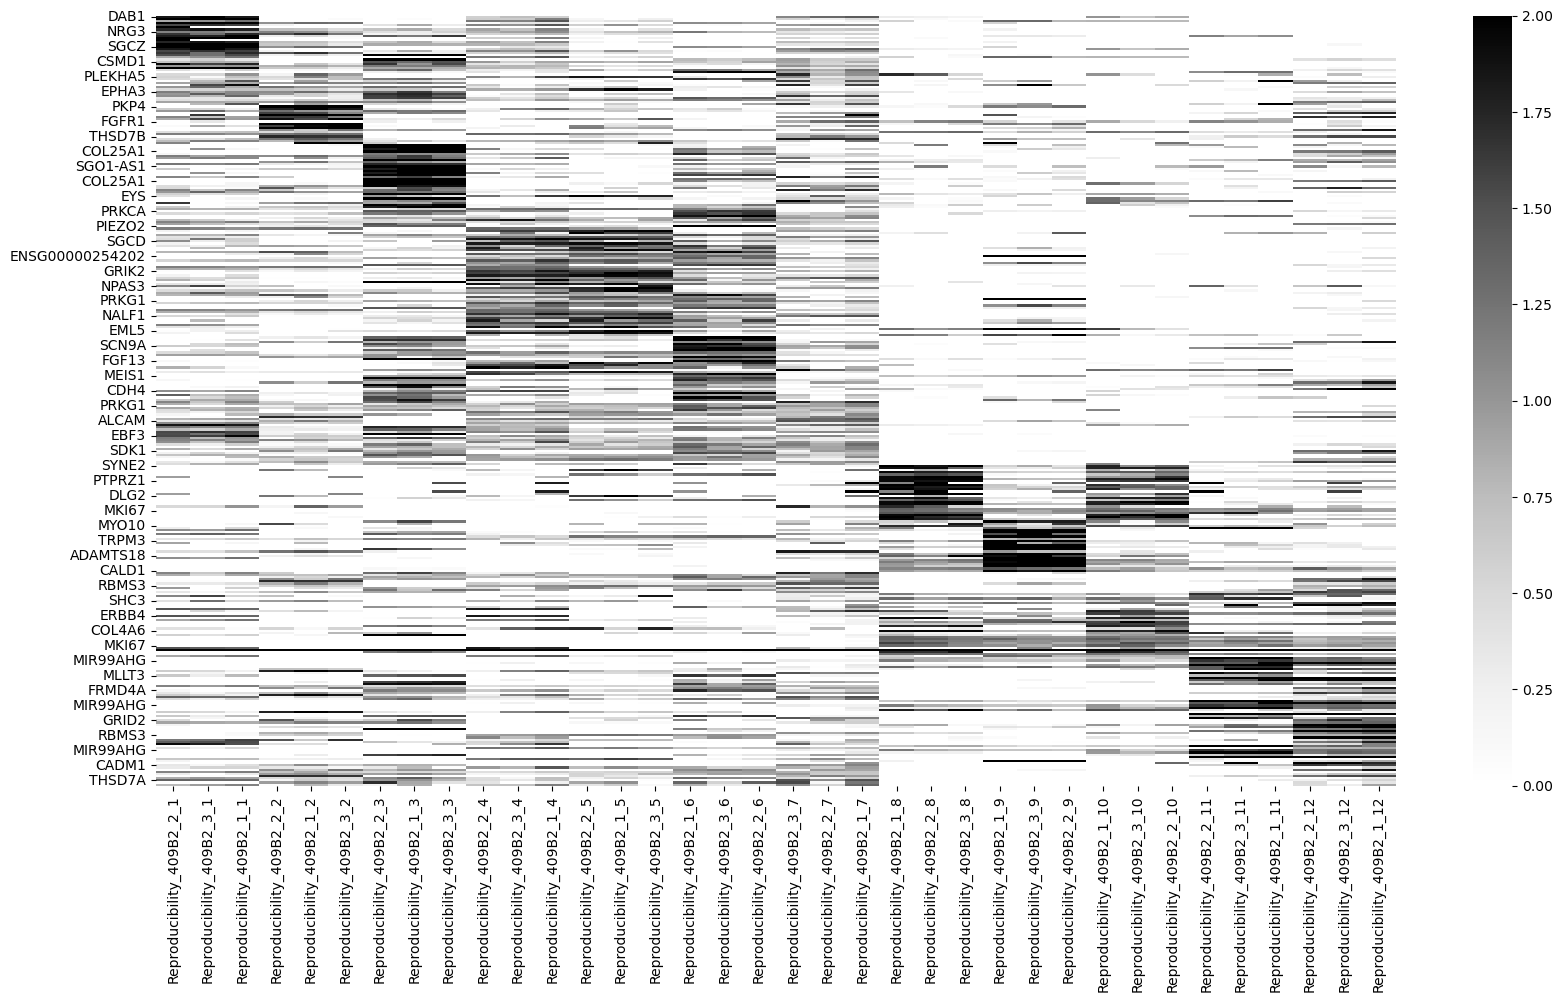

WTC


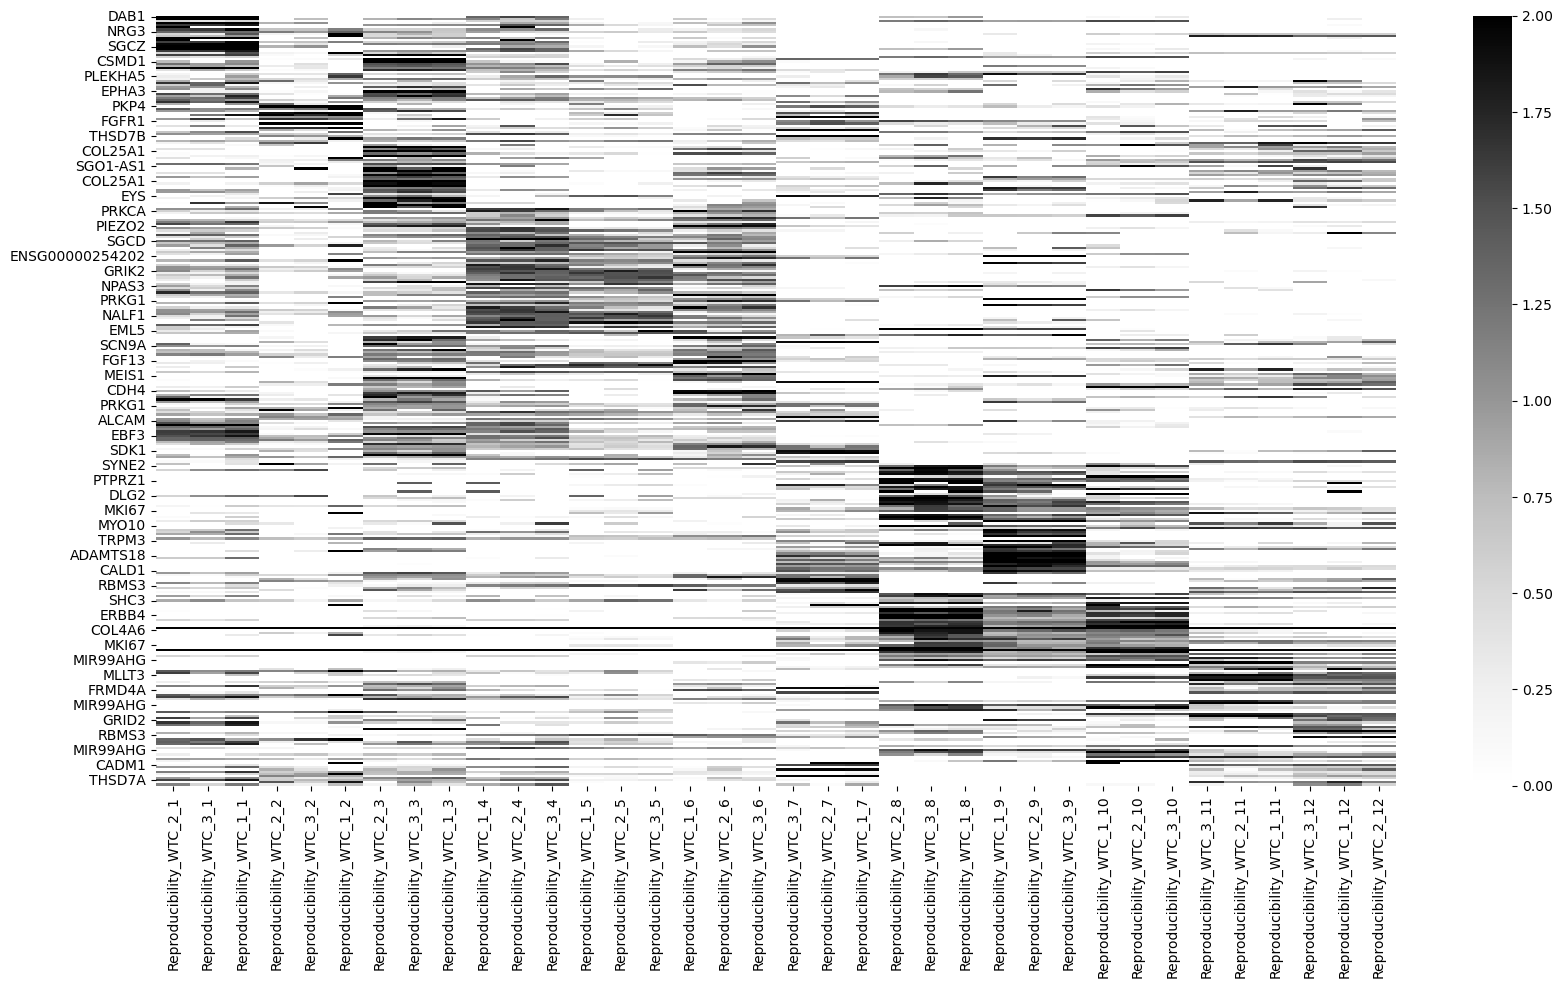

single_cell


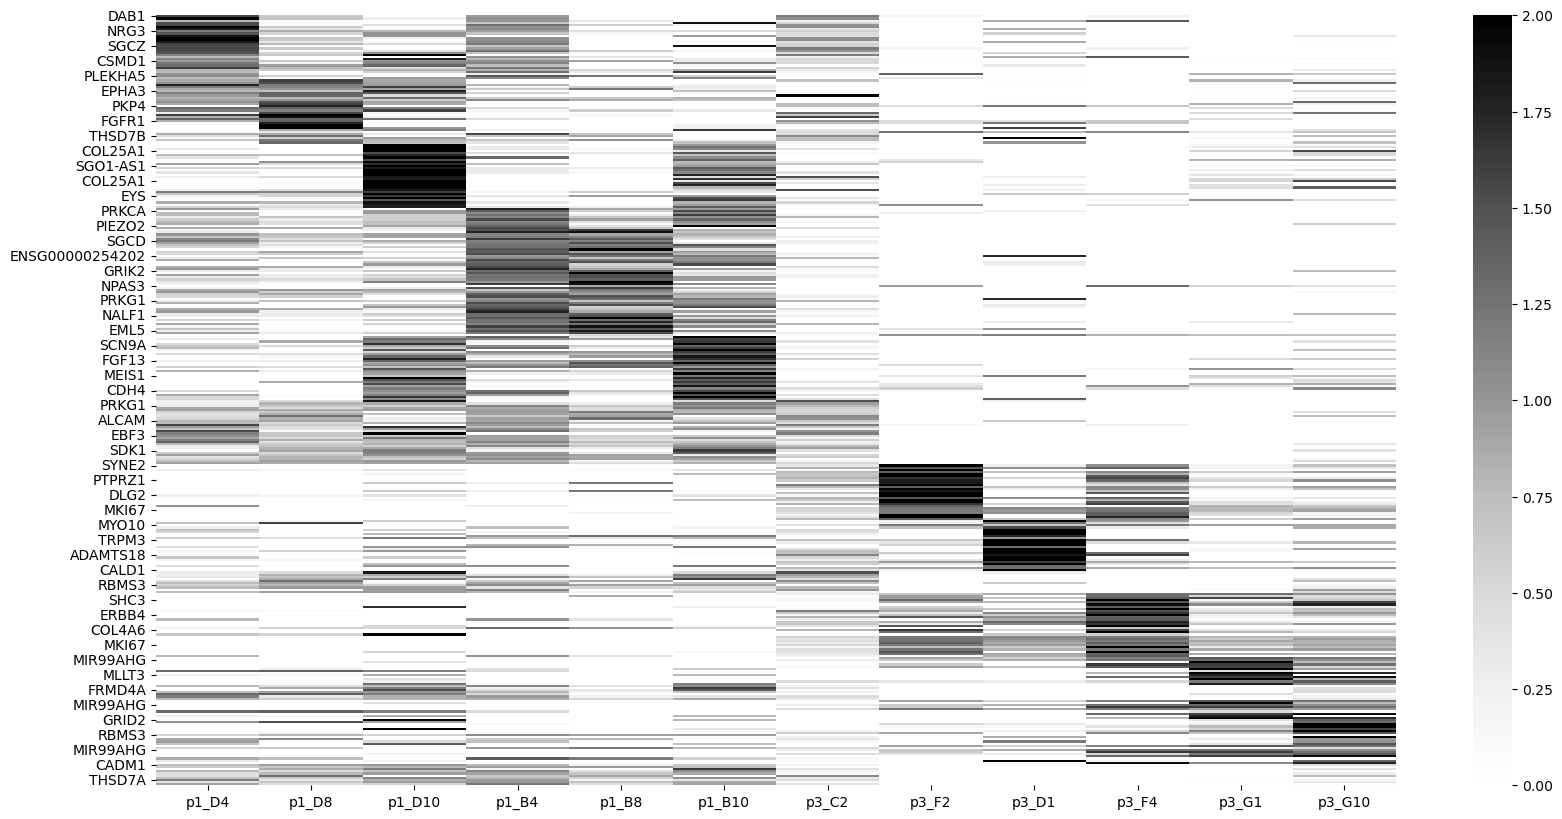

In [31]:
for genotype in set(meta_sorted['genotype']):
    print(genotype)
    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    dendrogram_labels = genotype_samples
    sample_markers_all = all_markers_plot

    vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
    vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

    plt.figure(figsize=(20,10))
    sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
    plt.savefig("reproducibility_plots/"+genotype+"_heatmap_Z_2_0_grey.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()


SC102A1


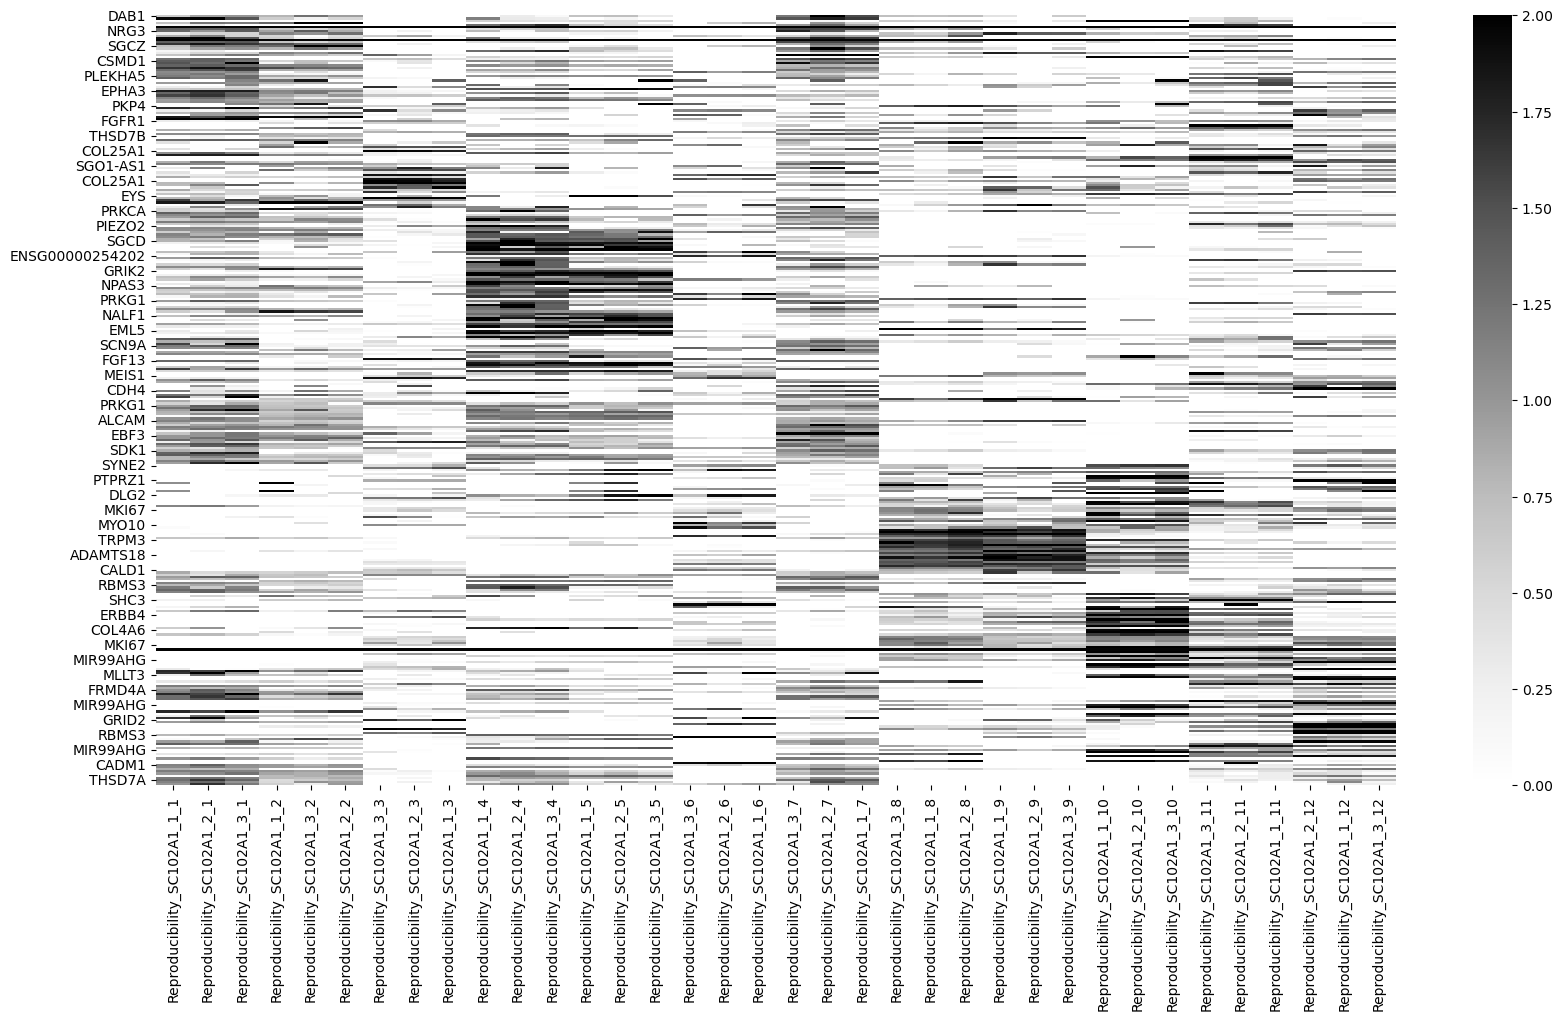

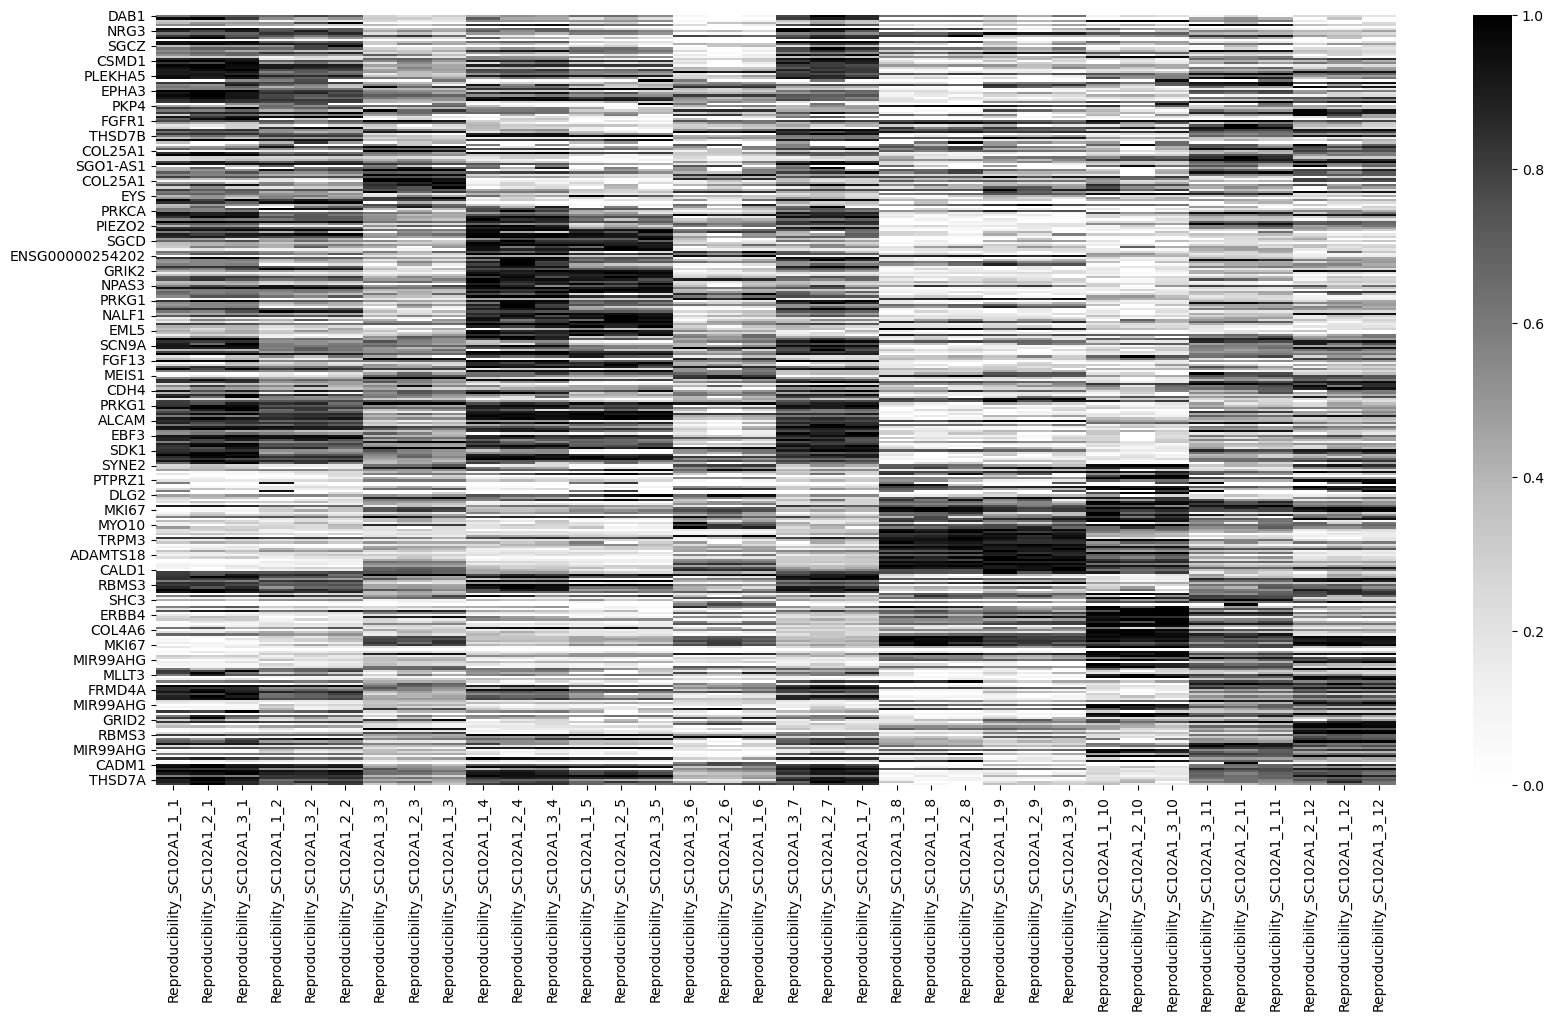

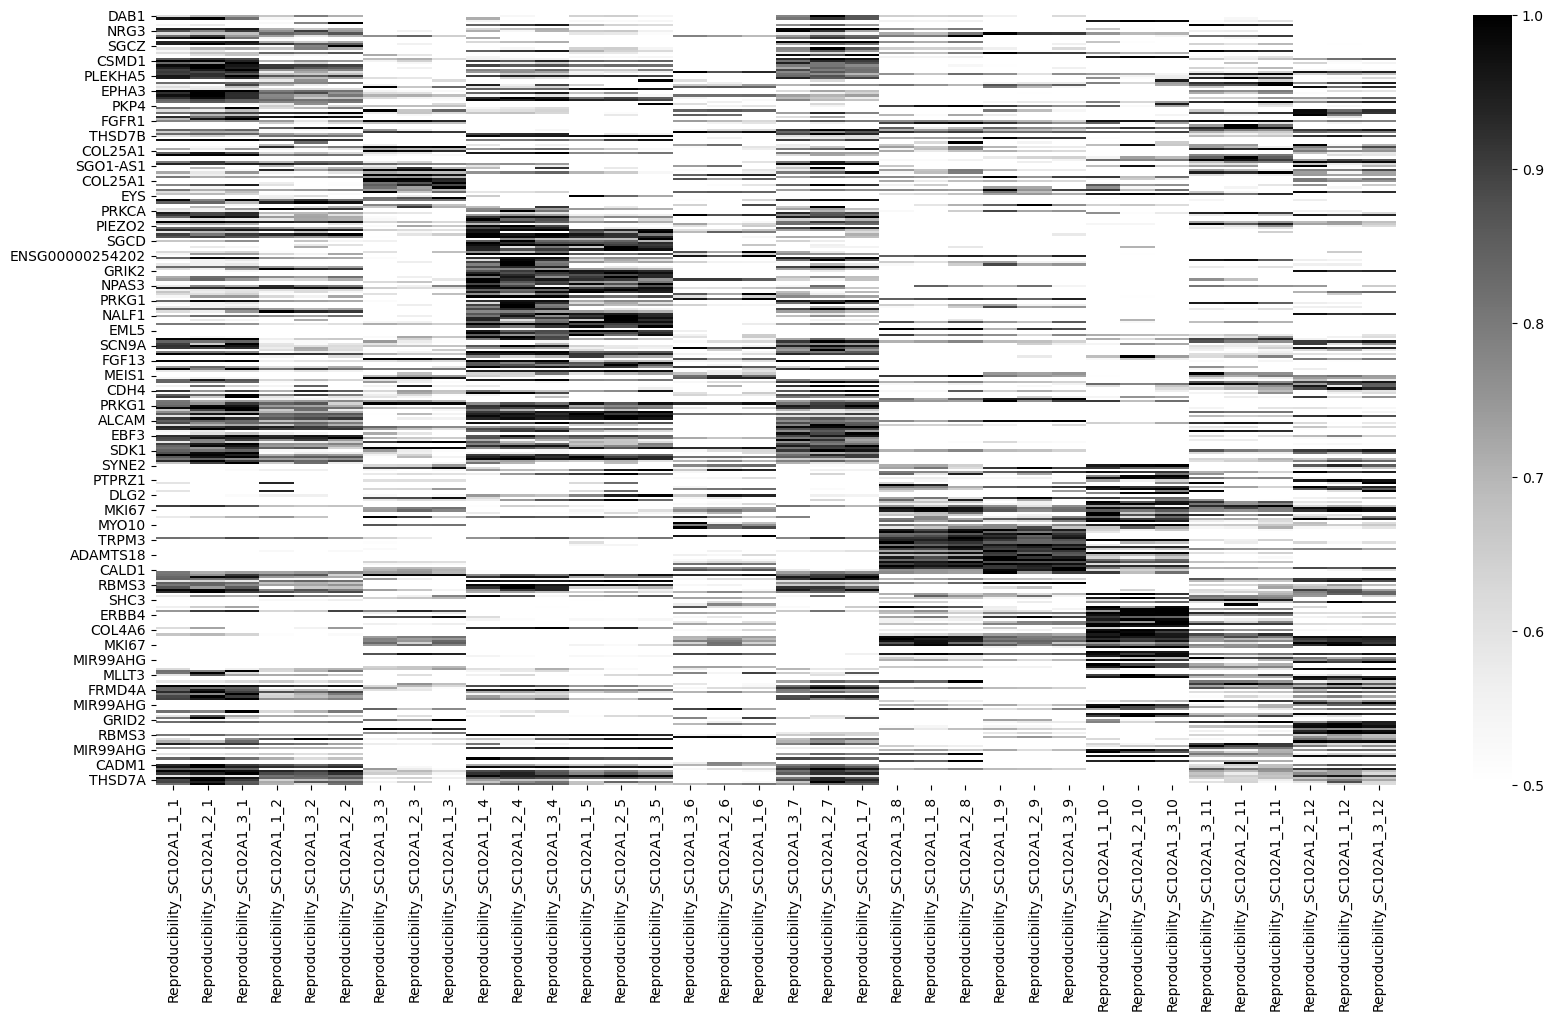

409B2


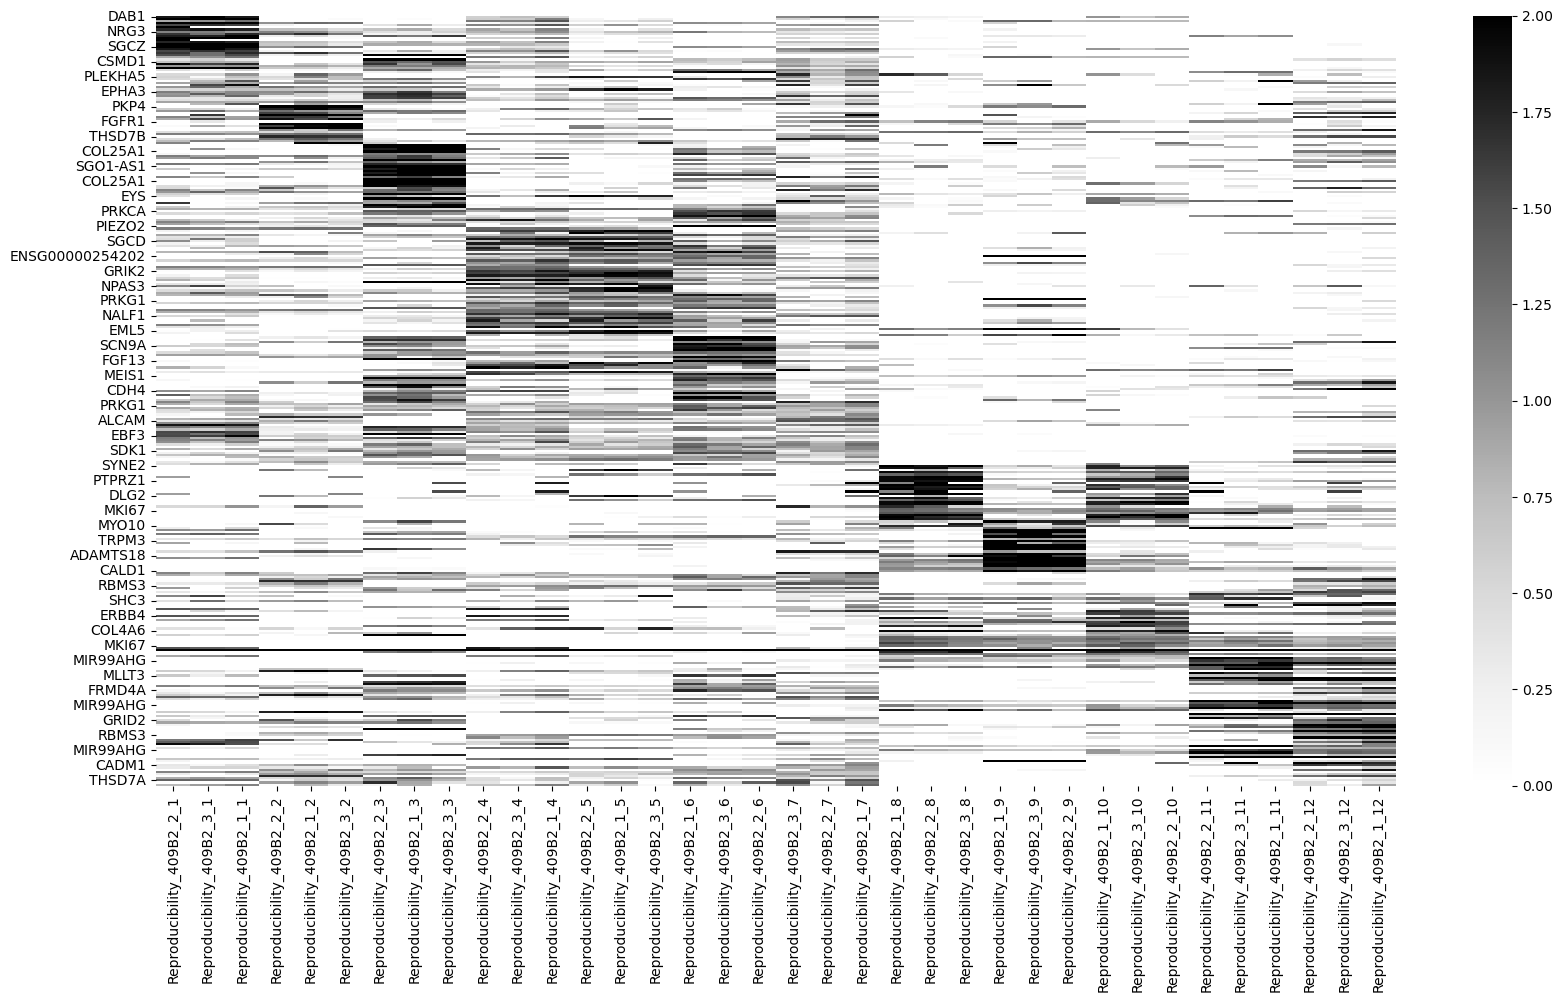

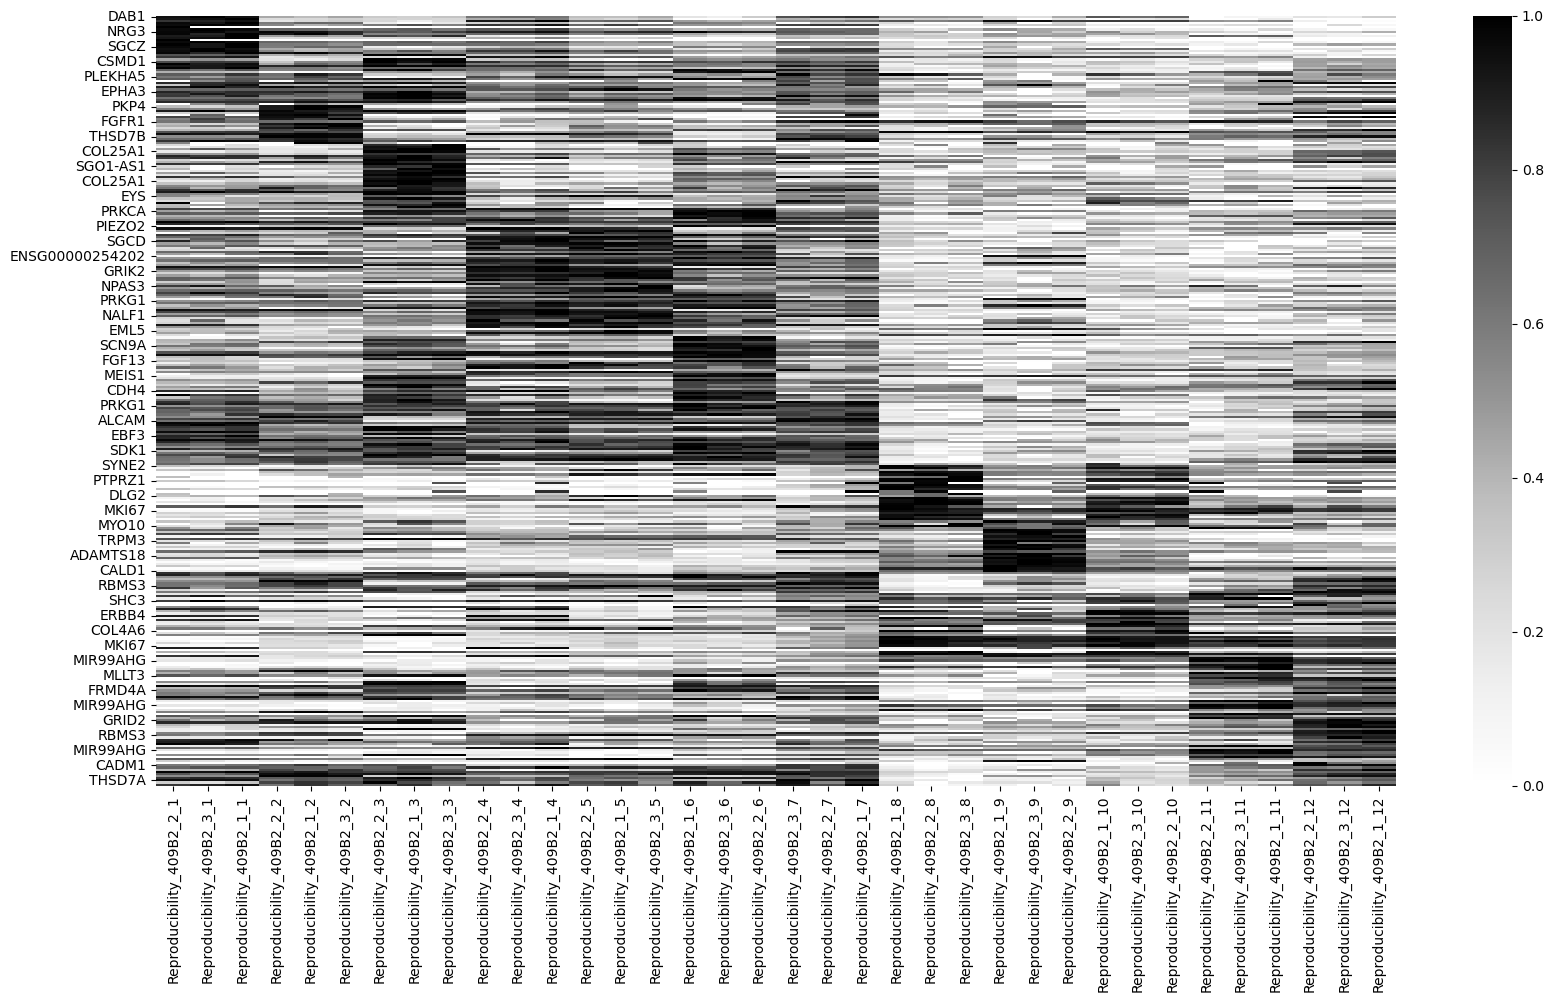

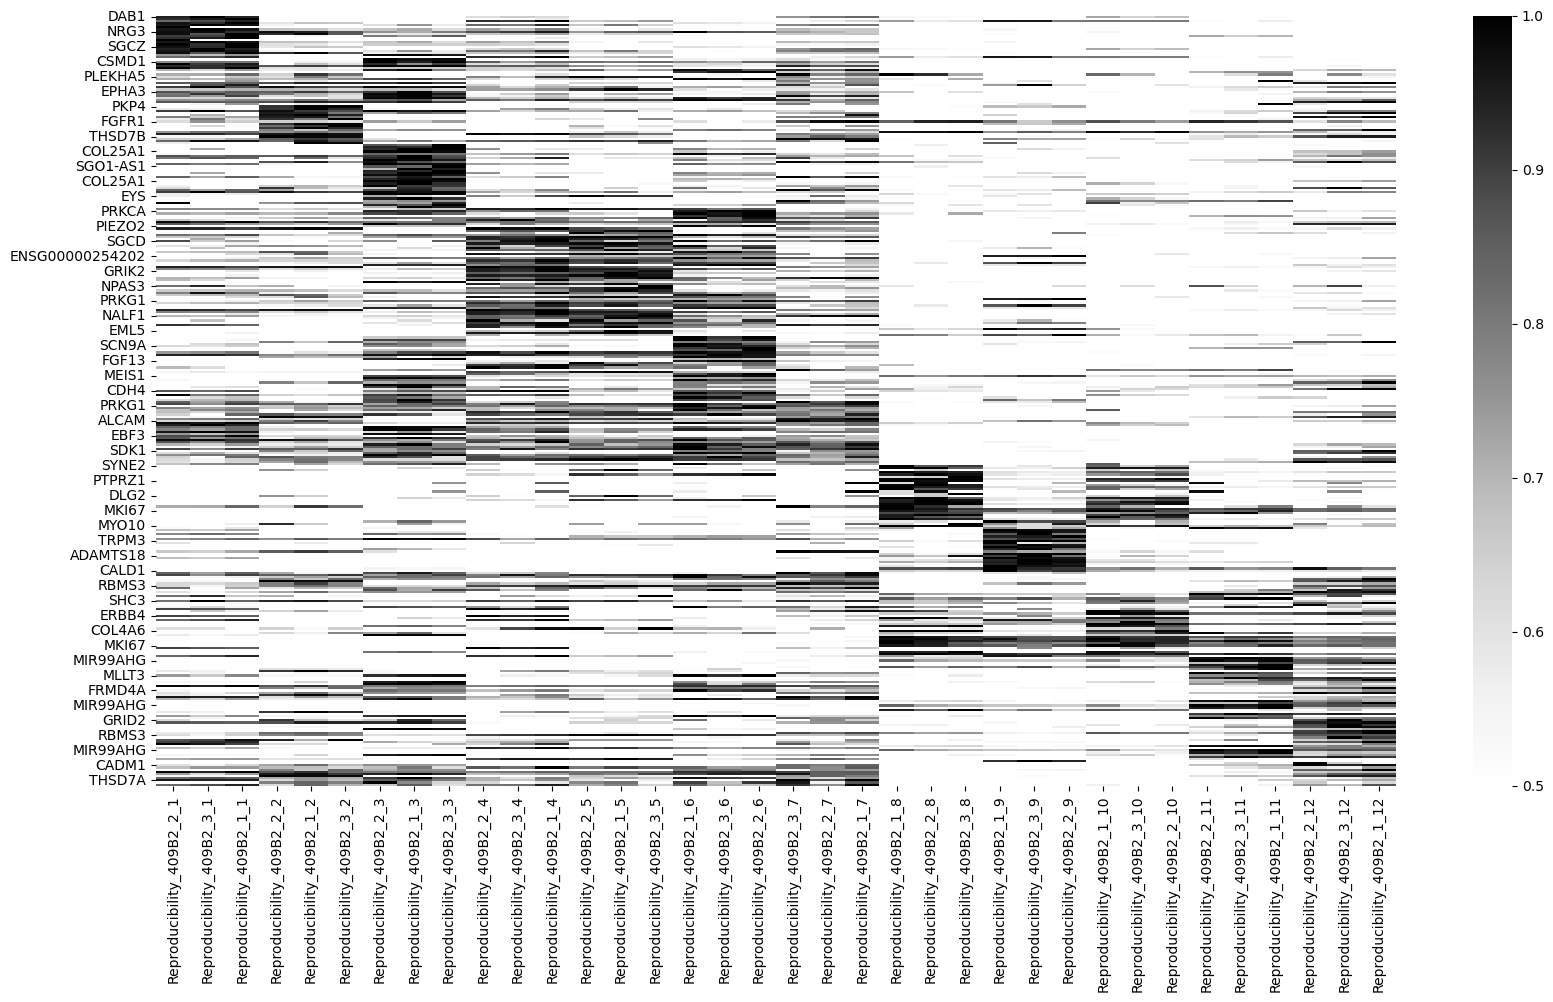

WTC


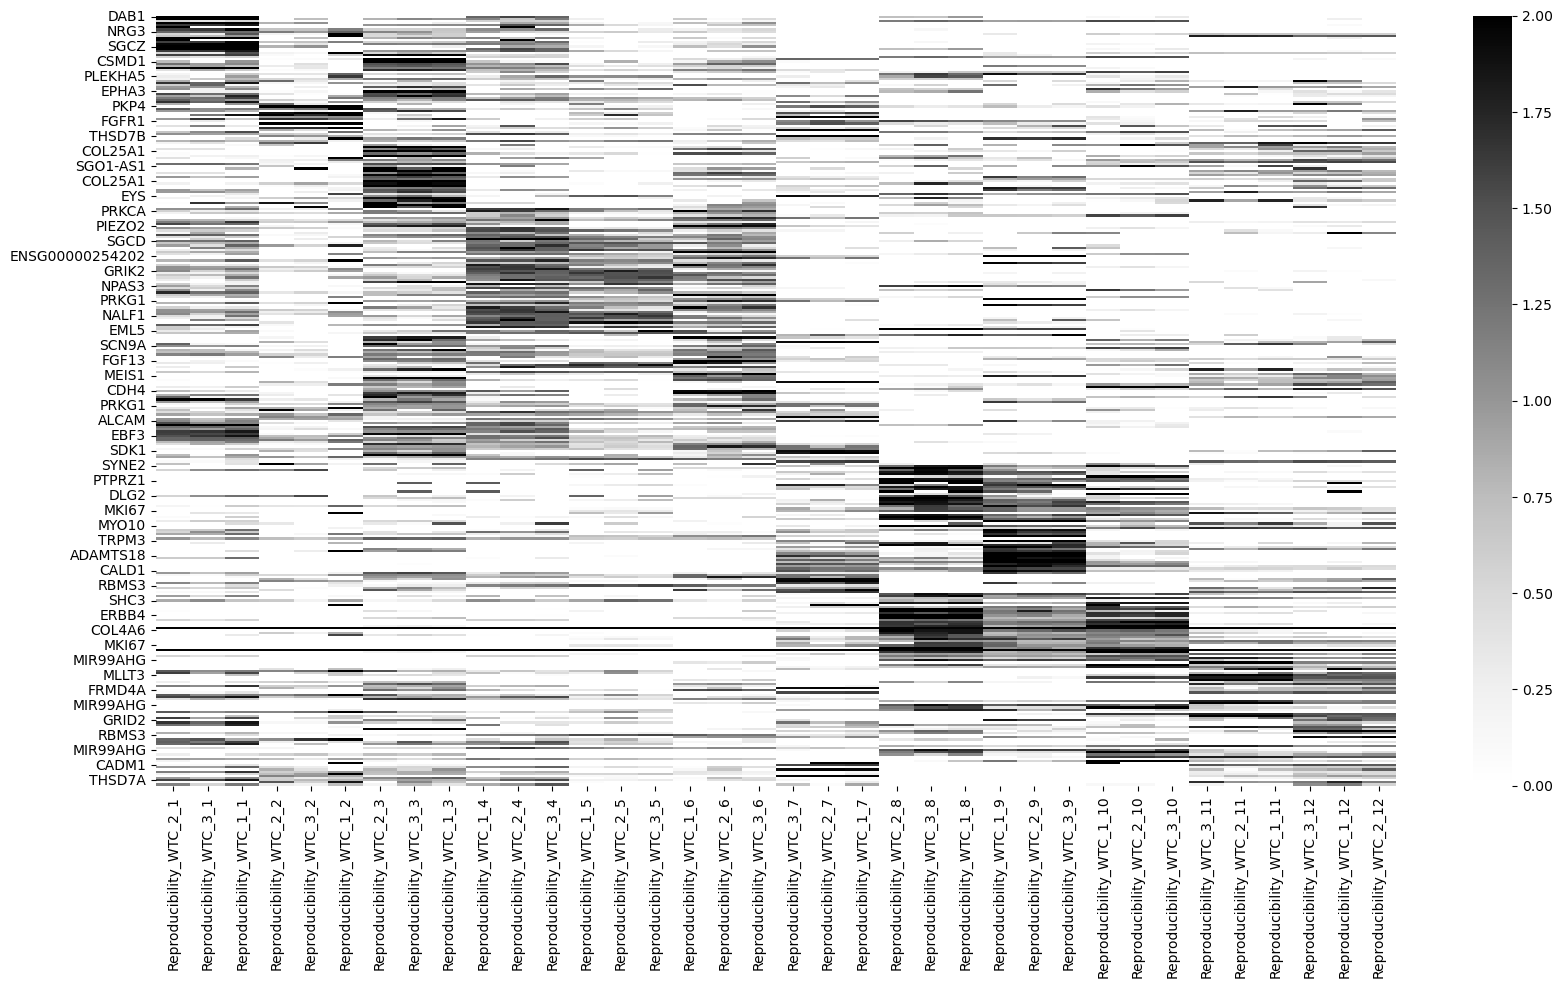

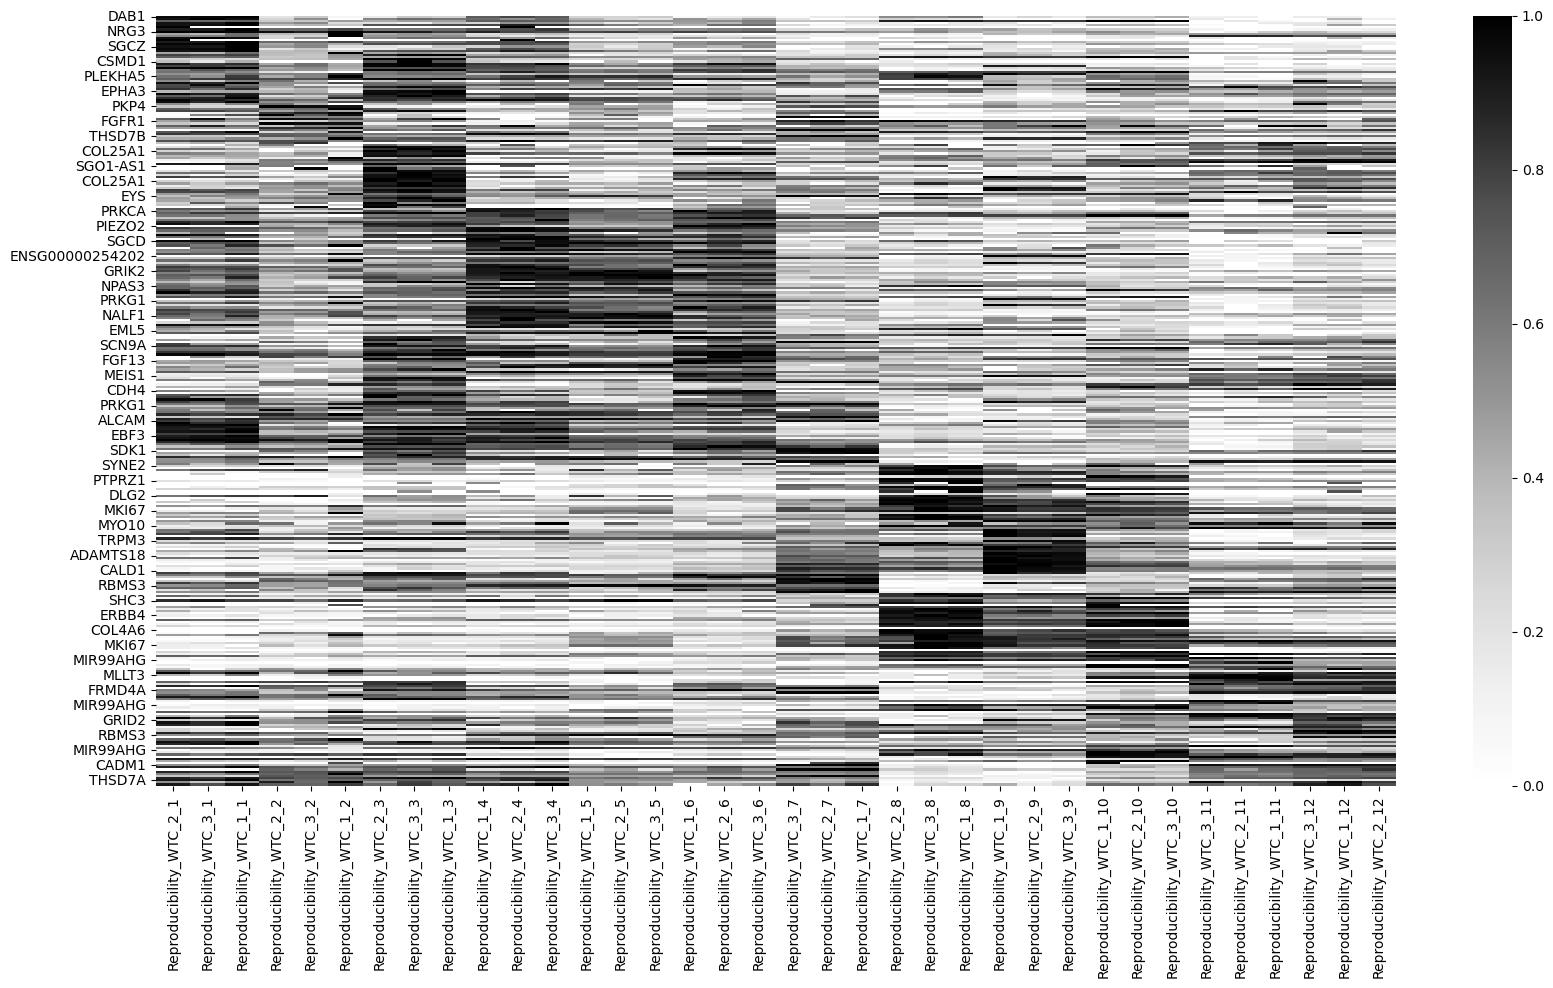

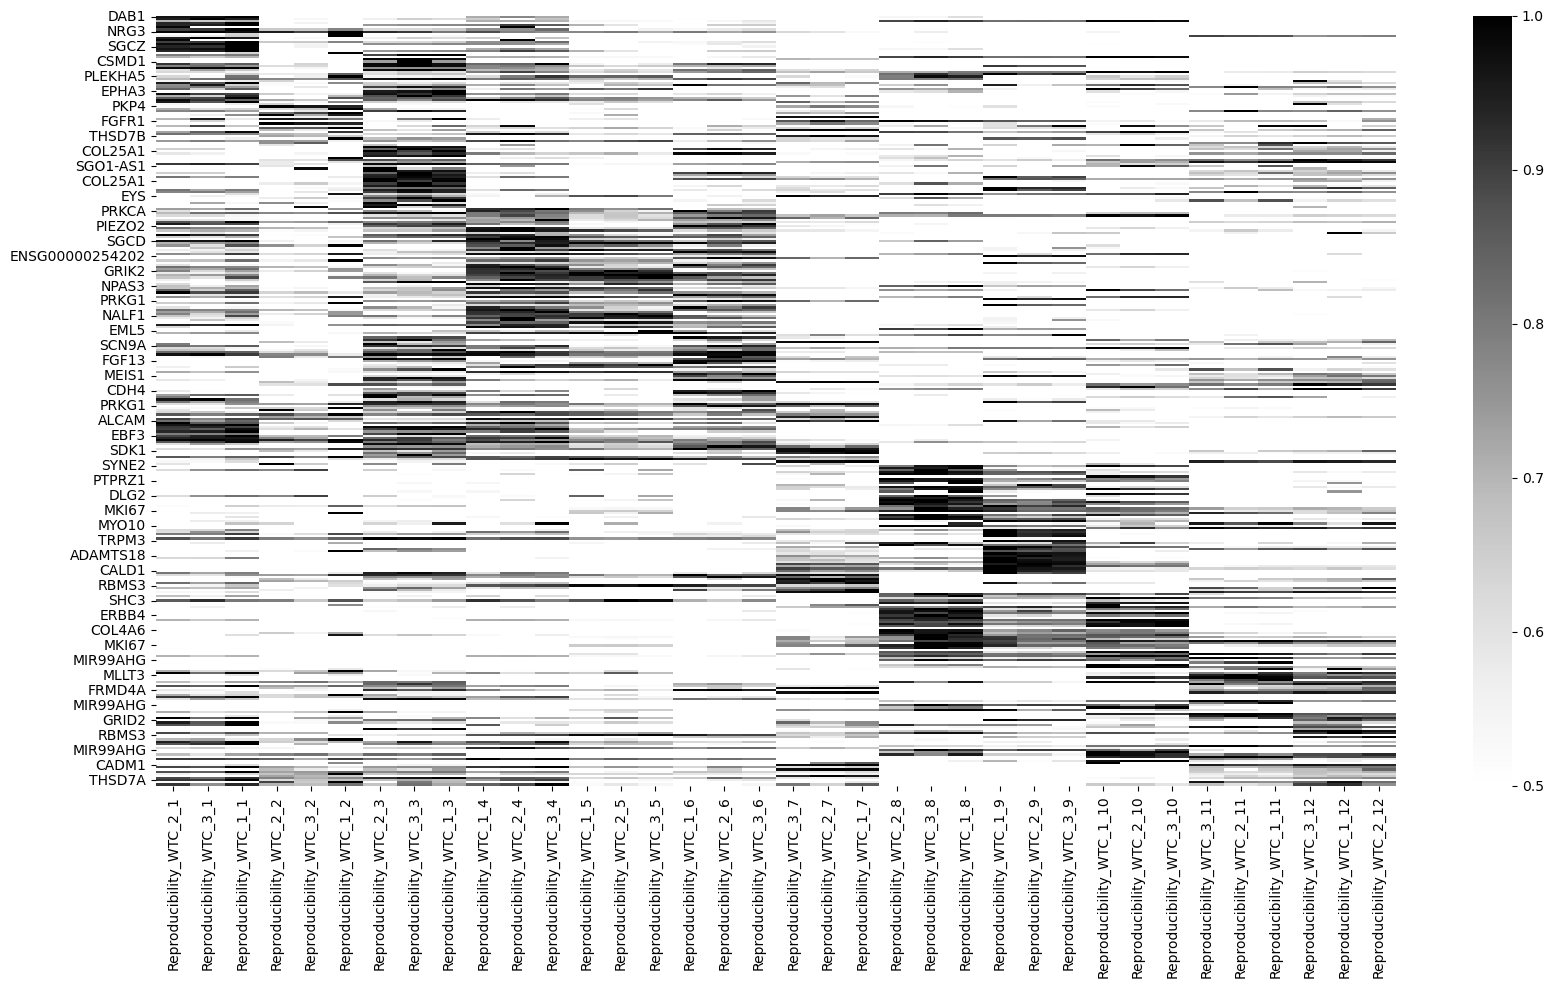

single_cell


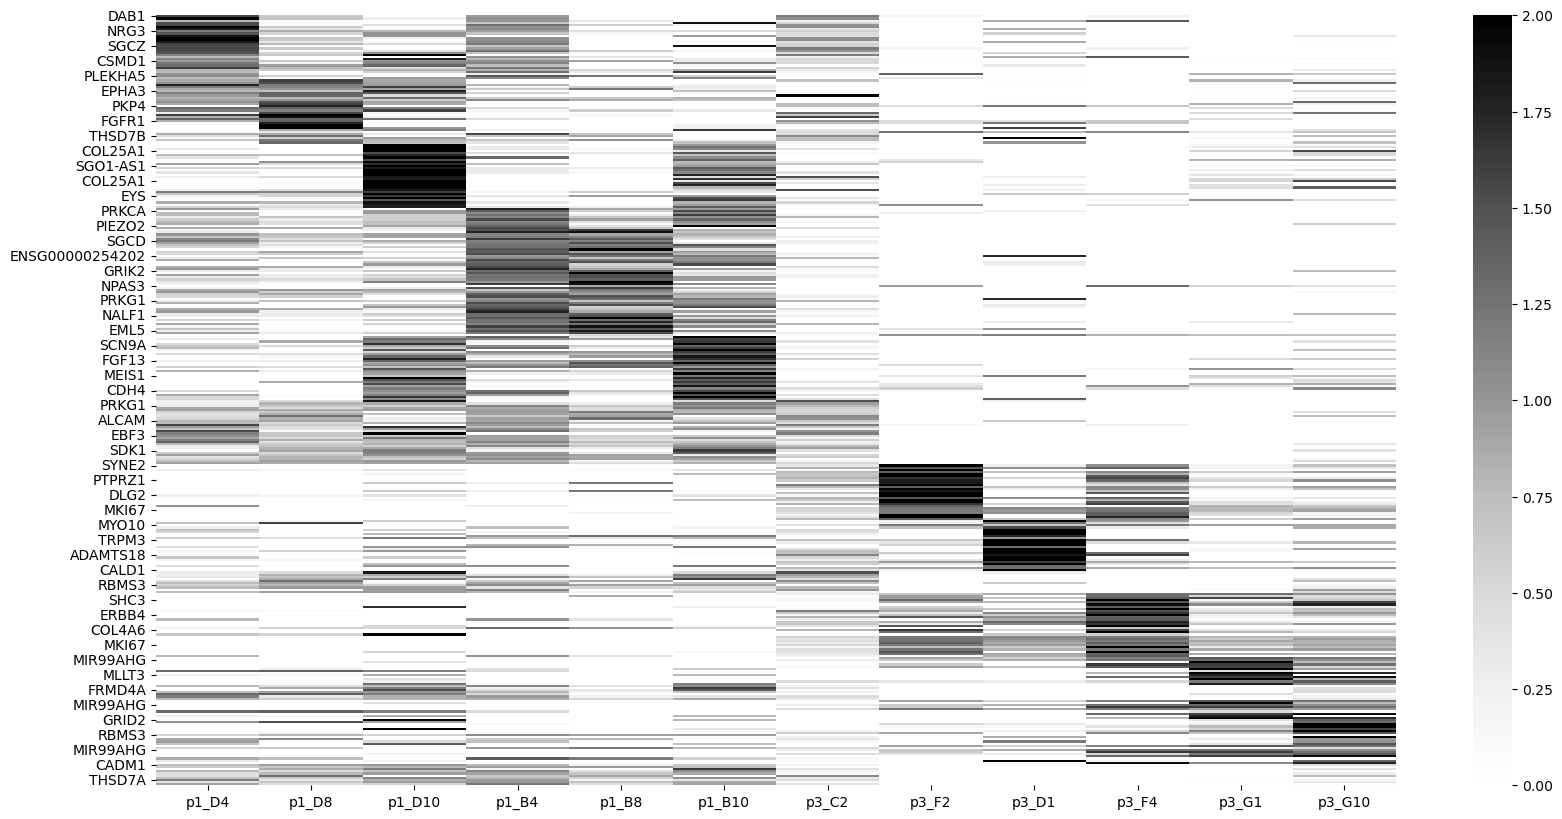

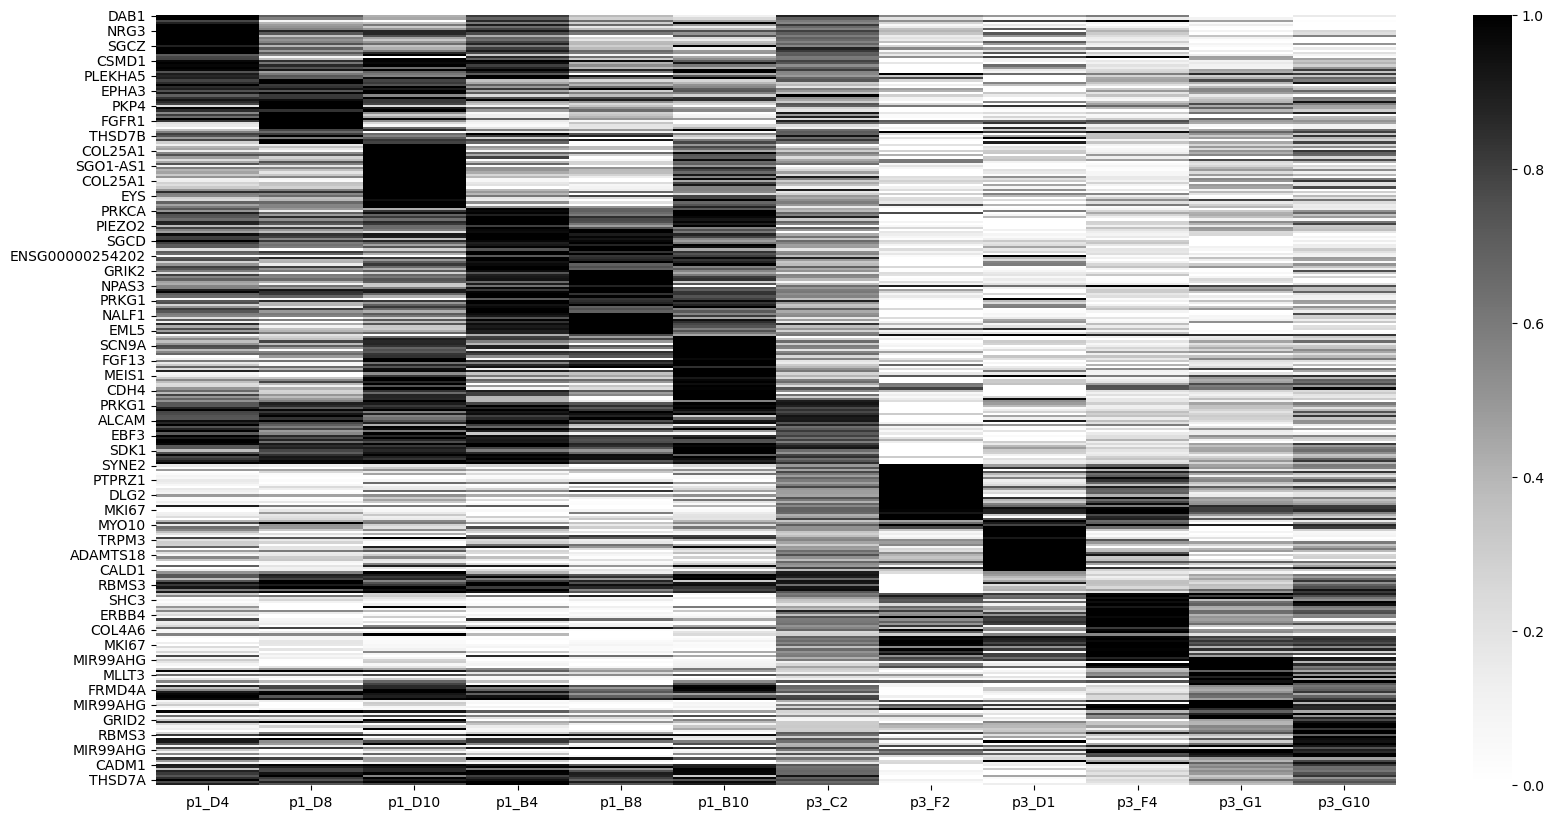

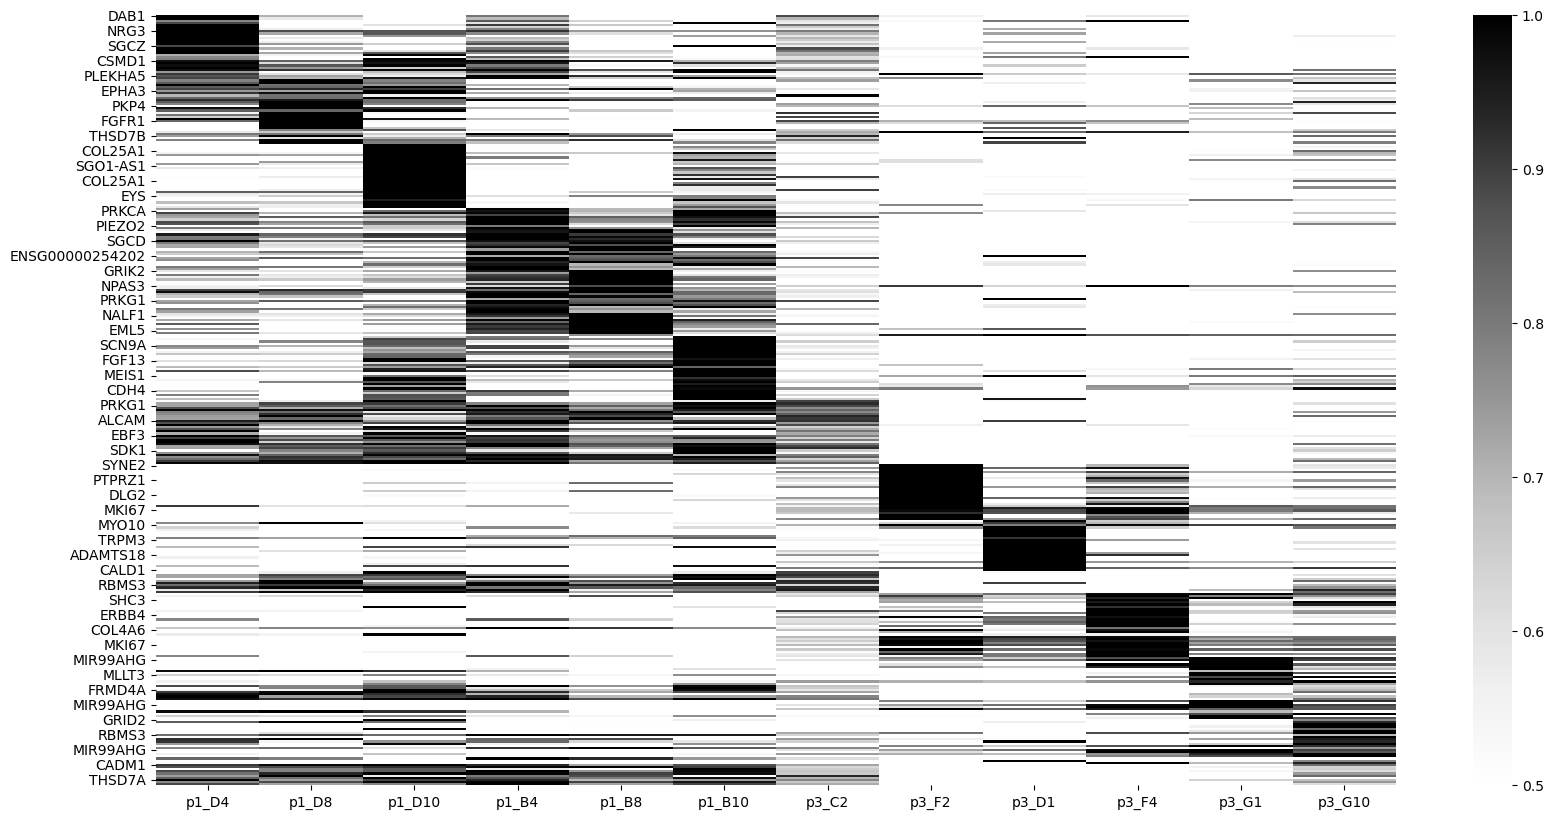

In [30]:
for genotype in set(meta_sorted['genotype']):
    print(genotype)
    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    dendrogram_labels = genotype_samples
    sample_markers_all = all_markers_plot

    vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
    vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

    plt.figure(figsize=(20,10))
    sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
    plt.savefig("reproducibility_plots/"+genotype+"_heatmap_Z_2_0_grey.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

    vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
    vsd_plot_minmax = vsd_plot_minmax.T

    plt.figure(figsize=(20,10))
    sns.heatmap(vsd_plot_minmax,vmin=0,vmax=1,cmap='Greys')
    plt.savefig("reproducibility_plots/"+genotype+"_heatmap_minmax_1_0_grey.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

    plt.figure(figsize=(20,10))
    sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1,cmap='Greys')
    plt.savefig("reproducibility_plots/"+genotype+"_heatmap_minmax_1_0.5_grey.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

In [27]:
mpl.rcParams['pdf.fonttype'] = 42

In [100]:
tested_conditions = ['p1_D4',
 'p1_D8',
 'p1_D10',
 'p1_B4',
 'p1_B8',
 'p1_B10',
 'p3_C2',
 'p3_F2',
 'p3_D1',
 'p3_F4',
 'p3_G1',
 'p3_G10']

In [105]:
tmp_cond = cond_combined.loc[tested_conditions]

In [106]:
tmp_cond.to_csv("bulk/condition_summary.tsv",sep="\t")

In [103]:
[print(x) for x in cond_combined.loc[tested_conditions,'condition']]

ctrl_ctrl_mTeSR
CHIR_4_ctrl_mTeSR
RA_3_ctrl_mTeSR
ctrl_BMP4_2_mTeSR
CHIR_4_BMP4_2_mTeSR
RA_3_BMP4_2_mTeSR
ctrl_ctrl_NIM
ctrl_ctrl_N2B27_2Si
XAV_3_BMP4_3_N2B27_2Si
CHIR_2_FGF8_ctrl_N2B27_2Si
ctrl_ctrl_N2B27_SB_CHIR
RA_2_BMP4_3_N2B27_SB_CHIR


[None, None, None, None, None, None, None, None, None, None, None, None]

In [77]:
dendrogram_labels

['p1_D4',
 'p1_D8',
 'p1_D10',
 'p1_B4',
 'p1_B8',
 'p1_B10',
 'p3_C2',
 'p3_F2',
 'p3_D1',
 'p3_F4',
 'p3_G1',
 'p3_G10']

genotype  repl  sample
Reproducibility_409B2_3_7           409B2     3       7
Reproducibility_409B2_2_7           409B2     2       7
Reproducibility_409B2_1_7           409B2     1       7
Reproducibility_409B2_1_8           409B2     1       8
Reproducibility_409B2_2_8           409B2     2       8
Reproducibility_409B2_3_8           409B2     3       8
Reproducibility_409B2_1_9           409B2     1       9
Reproducibility_409B2_3_9           409B2     3       9
Reproducibility_409B2_2_9           409B2     2       9
Reproducibility_409B2_1_10          409B2     1      10
Reproducibility_409B2_3_10          409B2     3      10
Reproducibility_409B2_2_10          409B2     2      10
Reproducibility_409B2_2_11          409B2     2      11
Reproducibility_409B2_3_11          409B2     3      11
Reproducibility_409B2_1_11          409B2     1      11
Reproducibility_409B2_2_12          409B2     2      12
Reproducibility_409B2_3_12          409B2     3      12
Reproducibility_409B2_1_12          409B2     1      12
Reproducibility_SC102A1_3_7       SC102A1     3       7
Reproducibility_SC102A1_2_7       SC102A1     2       7
Reproducibility_SC102A1_1_7       SC102A1     1       7
Reproducibility_SC102A1_3_8       SC102A1     3       8
Reproducibility_SC102A1_1_8       SC102A1     1       8
Reproducibility_SC102A1_2_8       SC102A1     2       8
Reproducibility_SC102A1_1_9       SC102A1     1       9
Reproducibility_SC102A1_2_9       SC102A1     2       9
Reproducibility_SC102A1_3_9       SC102A1     3       9
Reproducibility_SC102A1_1_10      SC102A1     1      10
Reproducibility_SC102A1_2_10      SC102A1     2      10
Reproducibility_SC102A1_3_10      SC102A1     3      10
Reproducibility_SC102A1_3_11      SC102A1     3      11
Reproducibility_SC102A1_2_11      SC102A1     2      11
Reproducibility_SC102A1_1_11      SC102A1     1      11
Reproducibility_SC102A1_2_12      SC102A1     2      12
Reproducibility_SC102A1_1_12      SC102A1     1      12
Reproducibility_SC102A1_3_12      SC102A1     3      12
Reproducibility_WTC_3_7               WTC     3       7
Reproducibility_WTC_2_7               WTC     2       7
Reproducibility_WTC_1_7               WTC     1       7
Reproducibility_WTC_2_8               WTC     2       8
Reproducibility_WTC_3_8               WTC     3       8
Reproducibility_WTC_1_8               WTC     1       8
Reproducibility_WTC_1_9               WTC     1       9
Reproducibility_WTC_2_9               WTC     2       9
Reproducibility_WTC_3_9               WTC     3       9
Reproducibility_WTC_1_10              WTC     1      10
Reproducibility_WTC_2_10              WTC     2      10
Reproducibility_WTC_3_10              WTC     3      10
Reproducibility_WTC_3_11              WTC     3      11
Reproducibility_WTC_2_11              WTC     2      11
Reproducibility_WTC_1_11              WTC     1      11
Reproducibility_WTC_3_12              WTC     3      12
Reproducibility_WTC_1_12              WTC     1      12
Reproducibility_WTC_2_12              WTC     2      12
p3_C2                         single_cell     1       7
p3_F2                         single_cell     1       8
p3_D1                         single_cell     1       9
p3_F4                         single_cell     1      10
p3_G1                         single_cell     1      11
p3_G10                        single_cell     1      12

genotype  repl  sample
Reproducibility_409B2_2_1          409B2     2       1
Reproducibility_409B2_3_1          409B2     3       1
Reproducibility_409B2_1_1          409B2     1       1
Reproducibility_409B2_2_2          409B2     2       2
Reproducibility_409B2_1_2          409B2     1       2
Reproducibility_409B2_3_2          409B2     3       2
Reproducibility_409B2_2_3          409B2     2       3
Reproducibility_409B2_1_3          409B2     1       3
Reproducibility_409B2_3_3          409B2     3       3
Reproducibility_409B2_2_4          409B2     2       4
Reproducibility_409B2_3_4          409B2     3       4
Reproducibility_409B2_1_4          409B2     1       4
Reproducibility_409B2_2_5          409B2     2       5
Reproducibility_409B2_1_5          409B2     1       5
Reproducibility_409B2_3_5          409B2     3       5
Reproducibility_409B2_1_6          409B2     1       6
Reproducibility_409B2_3_6          409B2     3       6
Reproducibility_409B2_2_6          409B2     2       6
Reproducibility_SC102A1_1_1      SC102A1     1       1
Reproducibility_SC102A1_2_1      SC102A1     2       1
Reproducibility_SC102A1_3_1      SC102A1     3       1
Reproducibility_SC102A1_1_2      SC102A1     1       2
Reproducibility_SC102A1_3_2      SC102A1     3       2
Reproducibility_SC102A1_2_2      SC102A1     2       2
Reproducibility_SC102A1_3_3      SC102A1     3       3
Reproducibility_SC102A1_2_3      SC102A1     2       3
Reproducibility_SC102A1_1_3      SC102A1     1       3
Reproducibility_SC102A1_1_4      SC102A1     1       4
Reproducibility_SC102A1_2_4      SC102A1     2       4
Reproducibility_SC102A1_3_4      SC102A1     3       4
Reproducibility_SC102A1_1_5      SC102A1     1       5
Reproducibility_SC102A1_2_5      SC102A1     2       5
Reproducibility_SC102A1_3_5      SC102A1     3       5
Reproducibility_SC102A1_3_6      SC102A1     3       6
Reproducibility_SC102A1_2_6      SC102A1     2       6
Reproducibility_SC102A1_1_6      SC102A1     1       6
Reproducibility_WTC_2_1              WTC     2       1
Reproducibility_WTC_3_1              WTC     3       1
Reproducibility_WTC_1_1              WTC     1       1
Reproducibility_WTC_2_2              WTC     2       2
Reproducibility_WTC_3_2              WTC     3       2
Reproducibility_WTC_1_2              WTC     1       2
Reproducibility_WTC_2_3              WTC     2       3
Reproducibility_WTC_3_3              WTC     3       3
Reproducibility_WTC_1_3              WTC     1       3
Reproducibility_WTC_1_4              WTC     1       4
Reproducibility_WTC_2_4              WTC     2       4
Reproducibility_WTC_3_4              WTC     3       4
Reproducibility_WTC_1_5              WTC     1       5
Reproducibility_WTC_2_5              WTC     2       5
Reproducibility_WTC_3_5              WTC     3       5
Reproducibility_WTC_1_6              WTC     1       6
Reproducibility_WTC_2_6              WTC     2       6
Reproducibility_WTC_3_6              WTC     3       6
p1_D4                        single_cell     1       1
p1_D8                        single_cell     1       2
p1_D10                       single_cell     1       3
p1_B4                        single_cell     1       4
p1_B8                        single_cell     1       5
p1_B10                       single_cell     1       6

SC102A1


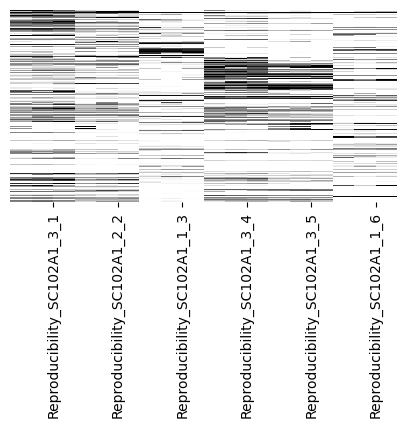

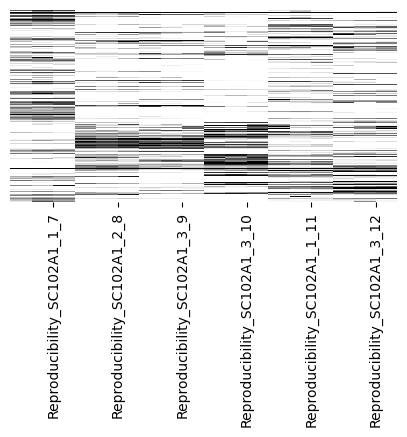

409B2


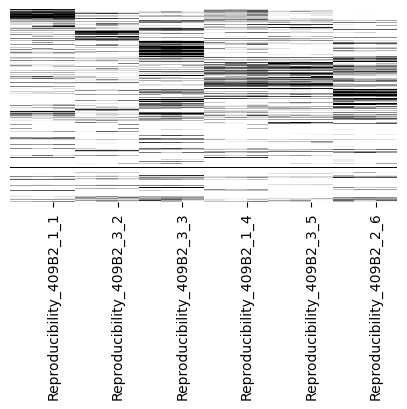

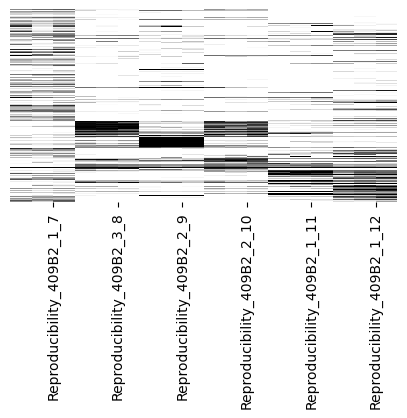

WTC


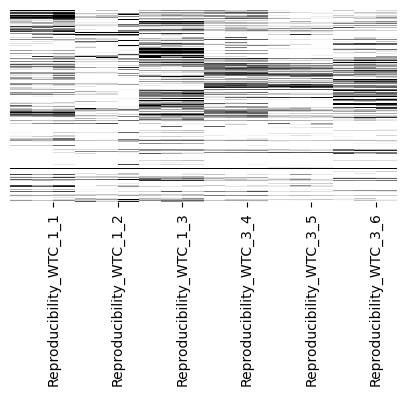

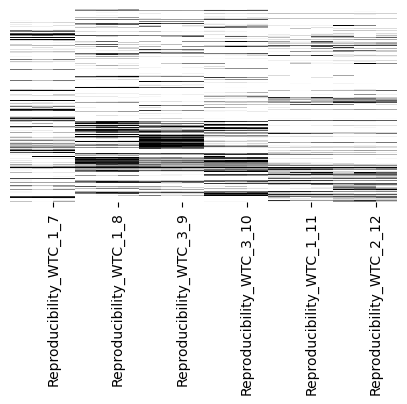

single_cell


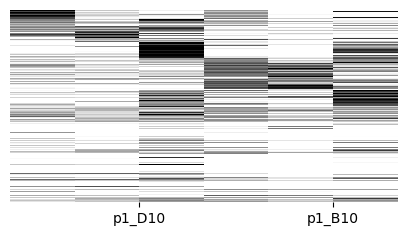

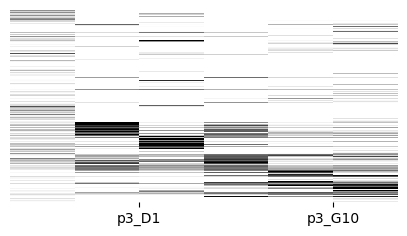

In [98]:
for genotype in set(meta_sorted['genotype']):
    print(genotype)
    #post patterning
    meta_sorted_post = meta_sorted.loc[meta_sorted['sample']<=6].copy()
    meta_sorted_pre = meta_sorted.loc[meta_sorted['sample']>6].copy()

    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    sample_markers_all = all_markers_plot

    vsd_plot = vsd.loc[sample_markers_all,genotype_samples]
    vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

    post_samples = [x for x in genotype_samples if x in meta_sorted_post.index]
    pre_samples = [x for x in genotype_samples if x in meta_sorted_pre.index]

    plt.figure(figsize=(5,2.5))
    data = vsd_plot_Z.loc[post_samples].T
    sns.heatmap(data,vmin=0,vmax=2,cmap='Greys',cbar=None)
    
    # Calculate x-tick positions automatically
    step = 3  # Step size for the ticks
    positions = list(range(2, data.shape[1], step))  # Start at 2, go up to the number of columns
    # Set x-ticks at the calculated positions with labels
    plt.xticks(positions, data.columns[positions])
    plt.yticks([])
    plt.savefig("reproducibility_plots/"+genotype+"_heatmap_Z_2_0_grey_post.png",dpi=350,bbox_inches='tight',pad_inches=0,)
    plt.show()
    plt.close()

    #pre patterning
    plt.figure(figsize=(5,2.5))
    data = vsd_plot_Z.loc[pre_samples].T
    sns.heatmap(data,vmin=0,vmax=2,cmap='Greys',cbar=None)

    # Calculate x-tick positions automatically
    step = 3  # Step size for the ticks
    positions = list(range(2, data.shape[1], step))  # Start at 2, go up to the number of columns
    
    # Set x-ticks at the calculated positions with labels
    plt.xticks(positions, data.columns[positions])
    plt.yticks([])
    plt.savefig("reproducibility_plots/"+genotype+"_heatmap_Z_2_0_grey_pre.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()



Index(['p3_D1', 'p3_G10'], dtype='object')

In [91]:
pre_samples

['p3_C2', 'p3_F2', 'p3_D1', 'p3_F4', 'p3_G1', 'p3_G10']

SC102A1


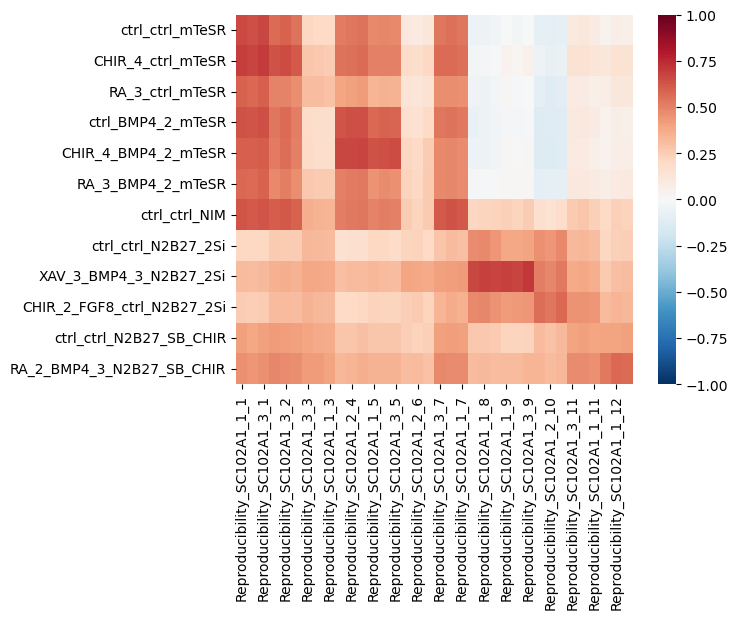

409B2


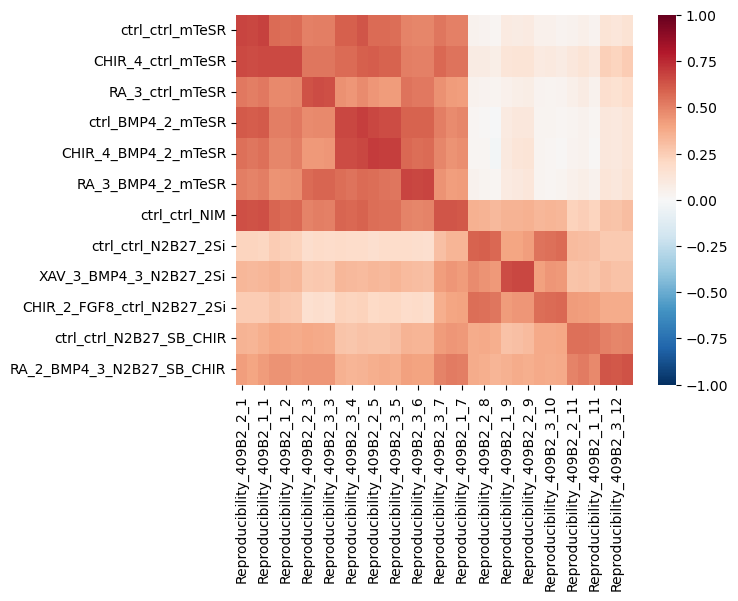

WTC


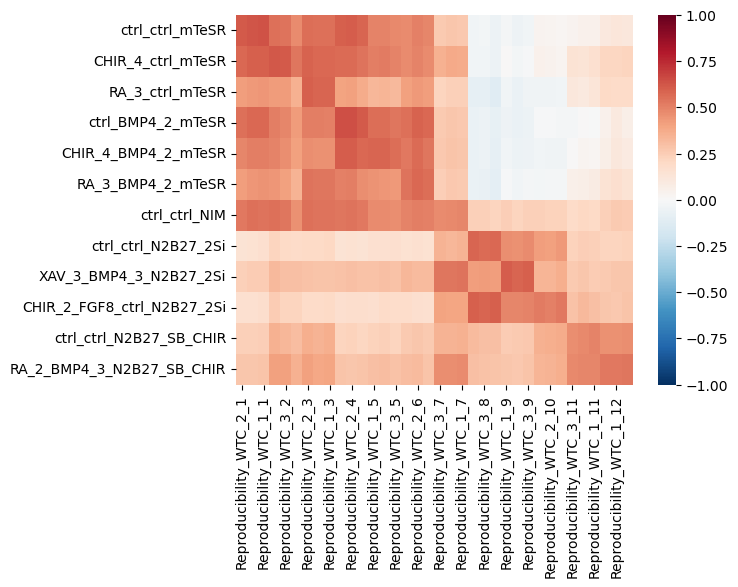

single_cell


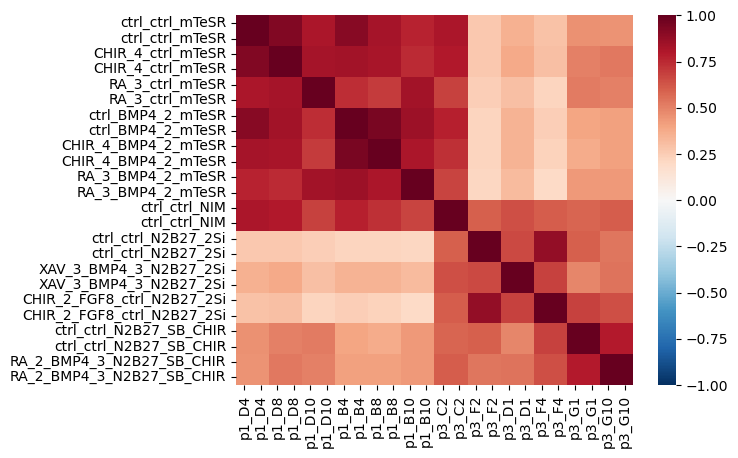

In [32]:
for genotype in list(set(meta_sorted['genotype'])):
    print(genotype)
    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    sc_samples = list(meta_sorted.loc[meta_sorted['genotype']=='single_cell'].index)

    genotype_samples_comb = genotype_samples + sc_samples
    vsd_plot_samples = vsd.loc[all_markers_plot,genotype_samples_comb]
    vsd_plot_sc = vsd.loc[all_markers_plot,sc_samples]

    data_plot = vsd_plot_samples.corr(method='spearman').loc[sc_samples,genotype_samples]
    data_plot.index = list(cond_combined.loc[data_plot.index,'condition'])
    fig,ax = plt.subplots()
    sns.heatmap(data_plot,cmap='RdBu_r',vmin=-1,vmax=1,ax=ax)
    # Turn spines off and create white grid.
    plt.savefig("figures/reproducibility_"+genotype+"_correlogram_with_screen.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/reproducibility_"+genotype+"_correlogram_with_screen.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

In [39]:
list(set(meta_sorted['genotype']))

['SC102A1', '409B2', 'WTC', 'single_cell']

In [42]:
genotype_samples

['p1_D4',
 'p1_D8',
 'p1_D10',
 'p1_B4',
 'p1_B8',
 'p1_B10',
 'p3_C2',
 'p3_F2',
 'p3_D1',
 'p3_F4',
 'p3_G1',
 'p3_G10']

In [44]:
vsd_plot_samples

p1_D4      p1_D8     p1_D10      p1_B4      p1_B8  \
DAB1             12.800735  11.808133  10.831169  12.157447  10.715910   
CNTNAP4          11.161997   8.763100   7.994991   9.393858   7.083056   
RMST             12.142238   9.451971   9.146943  12.457980  11.618884   
SGCZ             11.578697   8.558109   8.270511   9.795612   7.954745   
LRP1B            13.065094  10.826812  11.352756  12.646543  11.603475   
...                    ...        ...        ...        ...        ...   
THSD7B           11.838849  13.058163  11.048988  12.122033  12.511476   
AKAP6            12.656135  12.519719  13.191600  12.736510  12.463530   
THSD7A           12.512445  11.596461  12.136437  12.300733  11.460735   
ENSG00000283982  10.996290  11.383292  11.735020  11.788482  11.429563   
DST              12.657810  12.362422  12.452120  12.854824  12.367698   

                    p1_B10      p3_C2      p3_F2      p3_D1      p3_F4  ...  \
DAB1              9.835130  12.411505  11.305807  11.103091  11.409254  ...   
CNTNAP4           6.809595   9.436421   6.623331   5.736266   6.296396  ...   
RMST             10.832610  11.453159  11.187754  12.245796  12.998792  ...   
SGCZ             12.268584   9.519150   7.758607   6.264999   6.626532  ...   
LRP1B            10.866541  12.255105   8.981794   9.559301   8.805774  ...   
...                    ...        ...        ...        ...        ...  ...   
THSD7B            9.890771  12.766255   8.412225  10.504590  10.076426  ...   
AKAP6            13.095600  12.123753   9.625201   9.813557  10.246594  ...   
THSD7A           11.603838  11.764210   9.500627   9.072297   9.910602  ...   
ENSG00000283982  11.663788  10.612893   8.475746   8.324122   9.041921  ...   
DST              12.657145  12.337246  11.039032  11.289156  11.281018  ...   

                    p1_D10      p1_B4      p1_B8     p1_B10      p3_C2  \
DAB1             10.831169  12.157447  10.715910   9.835130  12.411505   
CNTNAP4           7.994991   9.393858   7.083056   6.809595   9.436421   
RMST              9.146943  12.457980  11.618884  10.832610  11.453159   
SGCZ              8.270511   9.795612   7.954745  12.268584   9.519150   
LRP1B            11.352756  12.646543  11.603475  10.866541  12.255105   
...                    ...        ...        ...        ...        ...   
THSD7B           11.048988  12.122033  12.511476   9.890771  12.766255   
AKAP6            13.191600  12.736510  12.463530  13.095600  12.123753   
THSD7A           12.136437  12.300733  11.460735  11.603838  11.764210   
ENSG00000283982  11.735020  11.788482  11.429563  11.663788  10.612893   
DST              12.452120  12.854824  12.367698  12.657145  12.337246   

                     p3_F2      p3_D1      p3_F4      p3_G1     p3_G10  
DAB1             11.305807  11.103091  11.409254   9.415615   9.948134  
CNTNAP4           6.623331   5.736266   6.296396   6.015020   5.433427  
RMST             11.187754  12.245796  12.998792  10.964509   9.227723  
SGCZ              7.758607   6.264999   6.626532   6.361175   6.115980  
LRP1B             8.981794   9.559301   8.805774   9.368315   8.731886  
...                    ...        ...        ...        ...        ...  
THSD7B            8.412225  10.504590  10.076426   9.864387  12.262884  
AKAP6             9.625201   9.813557  10.246594  11.035859  11.442151  
THSD7A            9.500627   9.072297   9.910602  11.276102  11.409267  
ENSG00000283982   8.475746   8.324122   9.041921   9.800083  10.919792  
DST              11.039032  11.289156  11.281018  11.704380  12.149411  

[360 rows x 24 columns]

In [46]:
genotype_samples

['p1_D4',
 'p1_D8',
 'p1_D10',
 'p1_B4',
 'p1_B8',
 'p1_B10',
 'p3_C2',
 'p3_F2',
 'p3_D1',
 'p3_F4',
 'p3_G1',
 'p3_G10']

SC102A1


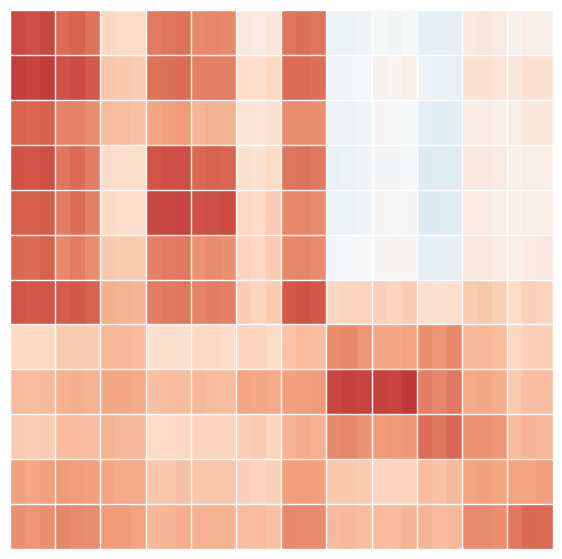

409B2


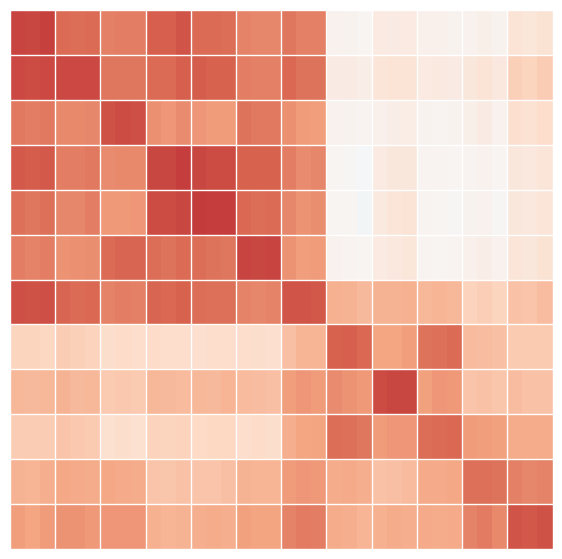

WTC


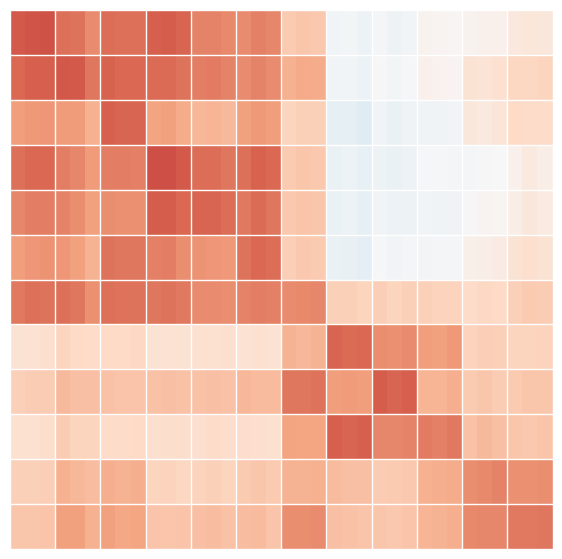

single_cell


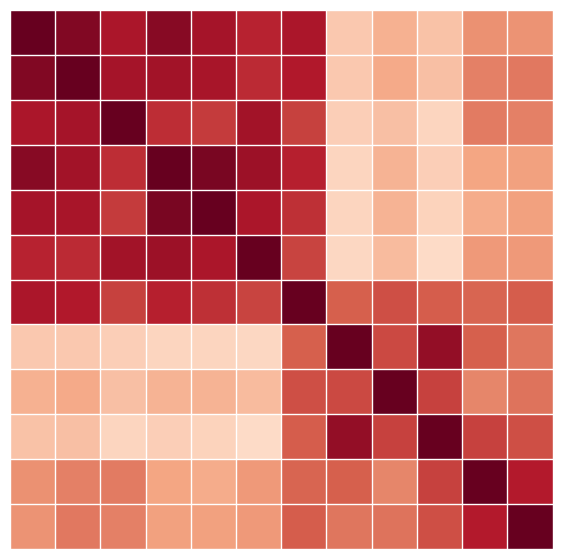

In [76]:
for genotype in list(set(meta_sorted['genotype'])):
    print(genotype)
    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    sc_samples = list(meta_sorted.loc[meta_sorted['genotype']=='single_cell'].index)

    genotype_samples_comb = genotype_samples + sc_samples
    vsd_plot_samples = vsd.loc[all_markers_plot,genotype_samples_comb]
    vsd_plot_sc = vsd.loc[all_markers_plot,sc_samples]

    data_plot = vsd_plot_samples.corr(method='spearman').loc[sc_samples,genotype_samples]
    data_plot.index = list(cond_combined.loc[data_plot.index,'condition'])

    data_plot = data_plot.drop_duplicates()
    data_plot = data_plot.T.drop_duplicates()
    data_plot = data_plot.T

    # Create the heatmap
    fig, ax = plt.subplots(figsize=(7,7))
    sns.heatmap(data_plot, 
                vmin=-1, vmax=1, cmap='RdBu_r',cbar=False,
                ax=ax,linewidths=0, linecolor='whitesmoke',rasterized=False)
    
    # Get the number of rows and columns in the heatmap
    n_rows, n_cols = data_plot.shape

    white_break_size = 1
    # Add white lines every 3rd column (vertical lines)
    if genotype in ['SC102A1', '409B2', 'WTC']:
        for x in range(0, n_cols+1, 3):
            ax.axvline(x=x, color='white', linewidth=white_break_size)
    else:
        for x in range(-1, n_cols+1):
            ax.axvline(x=x, color='white', linewidth=white_break_size)

        
    # Add white lines every 1st row (horizontal lines)
    for y in range(-1, n_rows+1):
        ax.axhline(y=y, color='white', linewidth=white_break_size)
    
    plt.xticks([])
    plt.yticks([])
    # Turn spines off and create white grid.
    plt.savefig("figures/reproducibility_"+genotype+"_correlogram_with_screen_split_small.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/reproducibility_"+genotype+"_correlogram_with_screen_split_small.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()

SC102A1


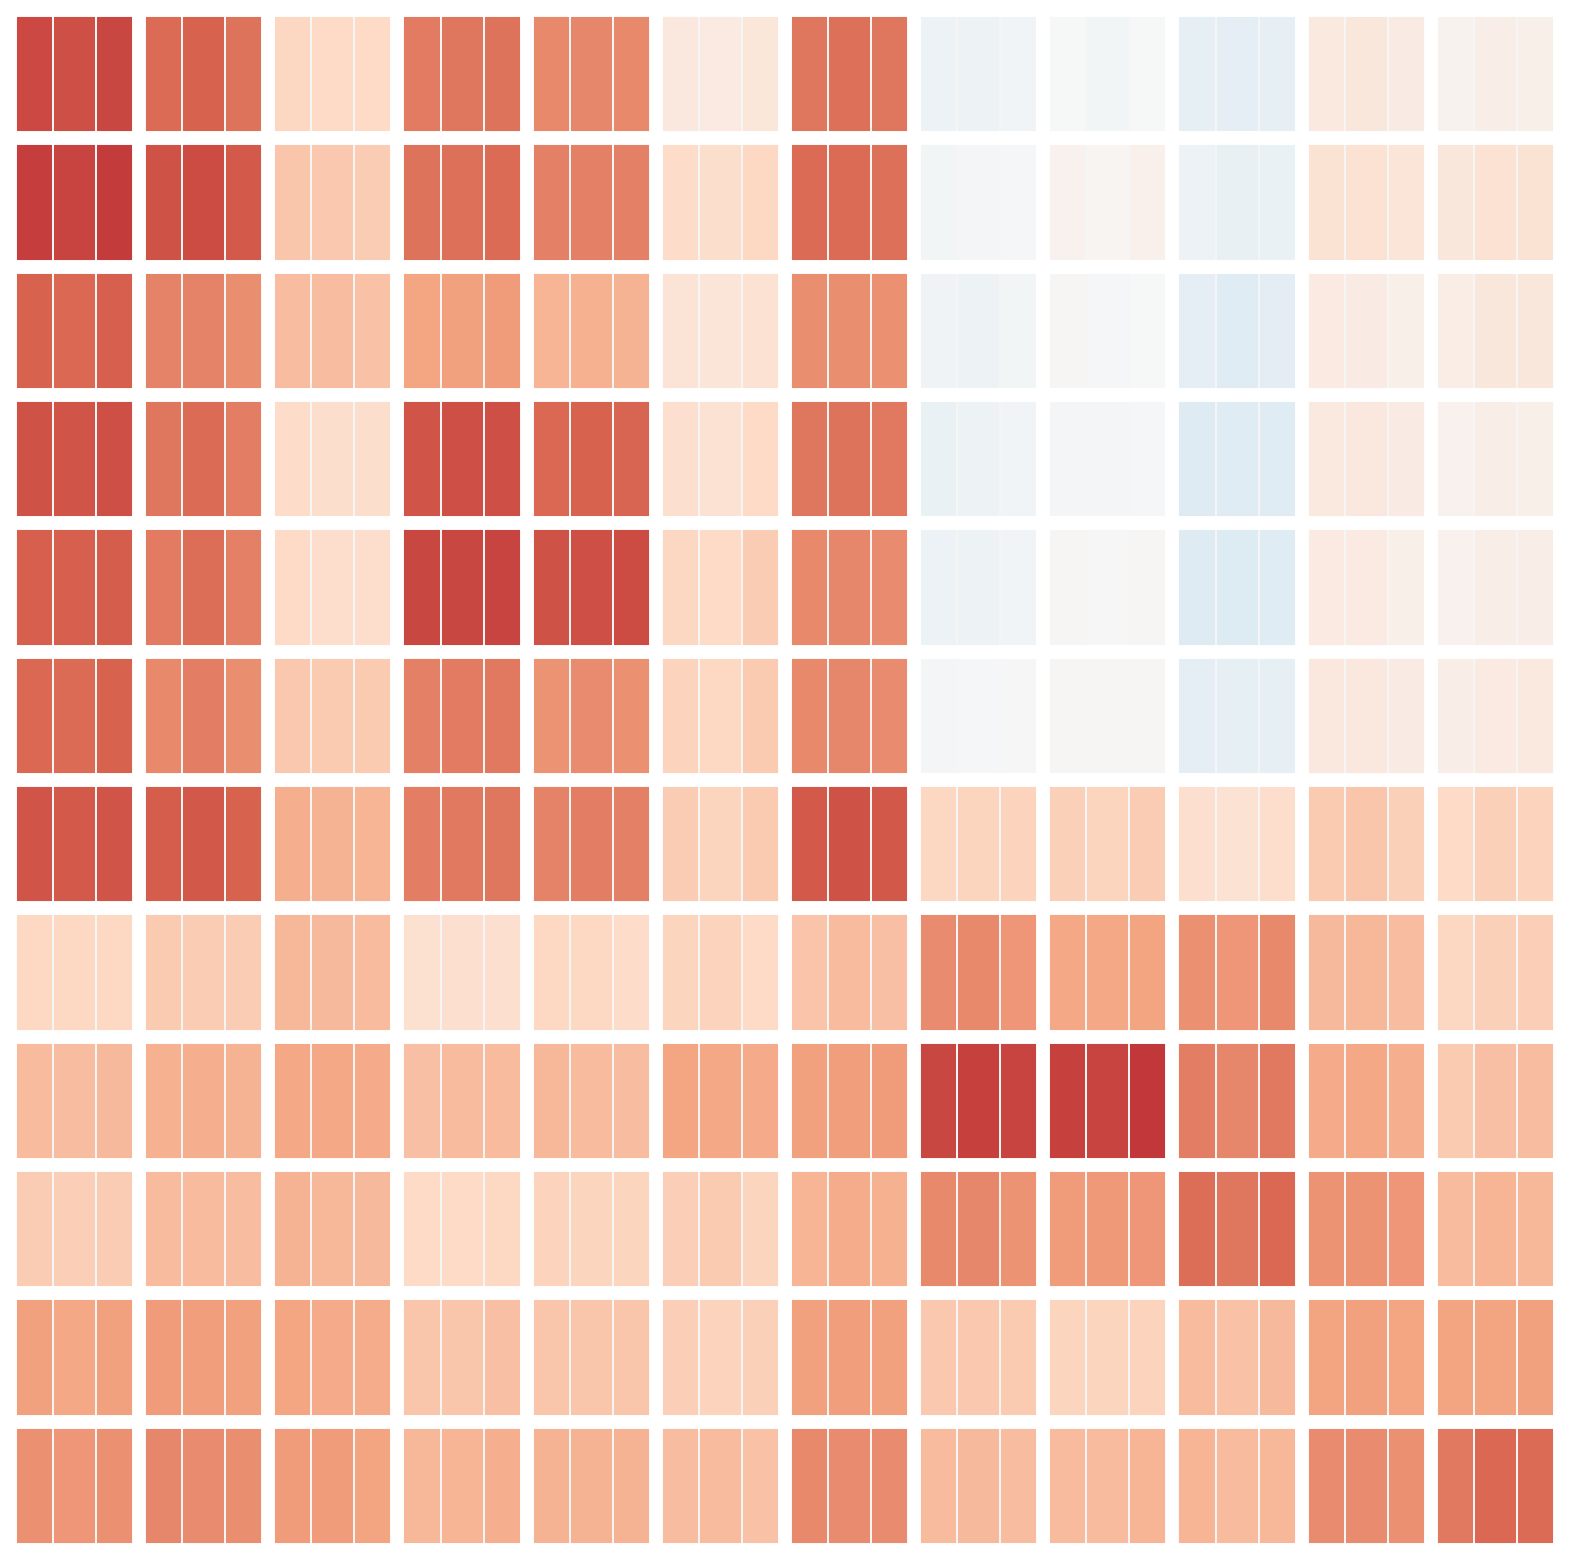

409B2


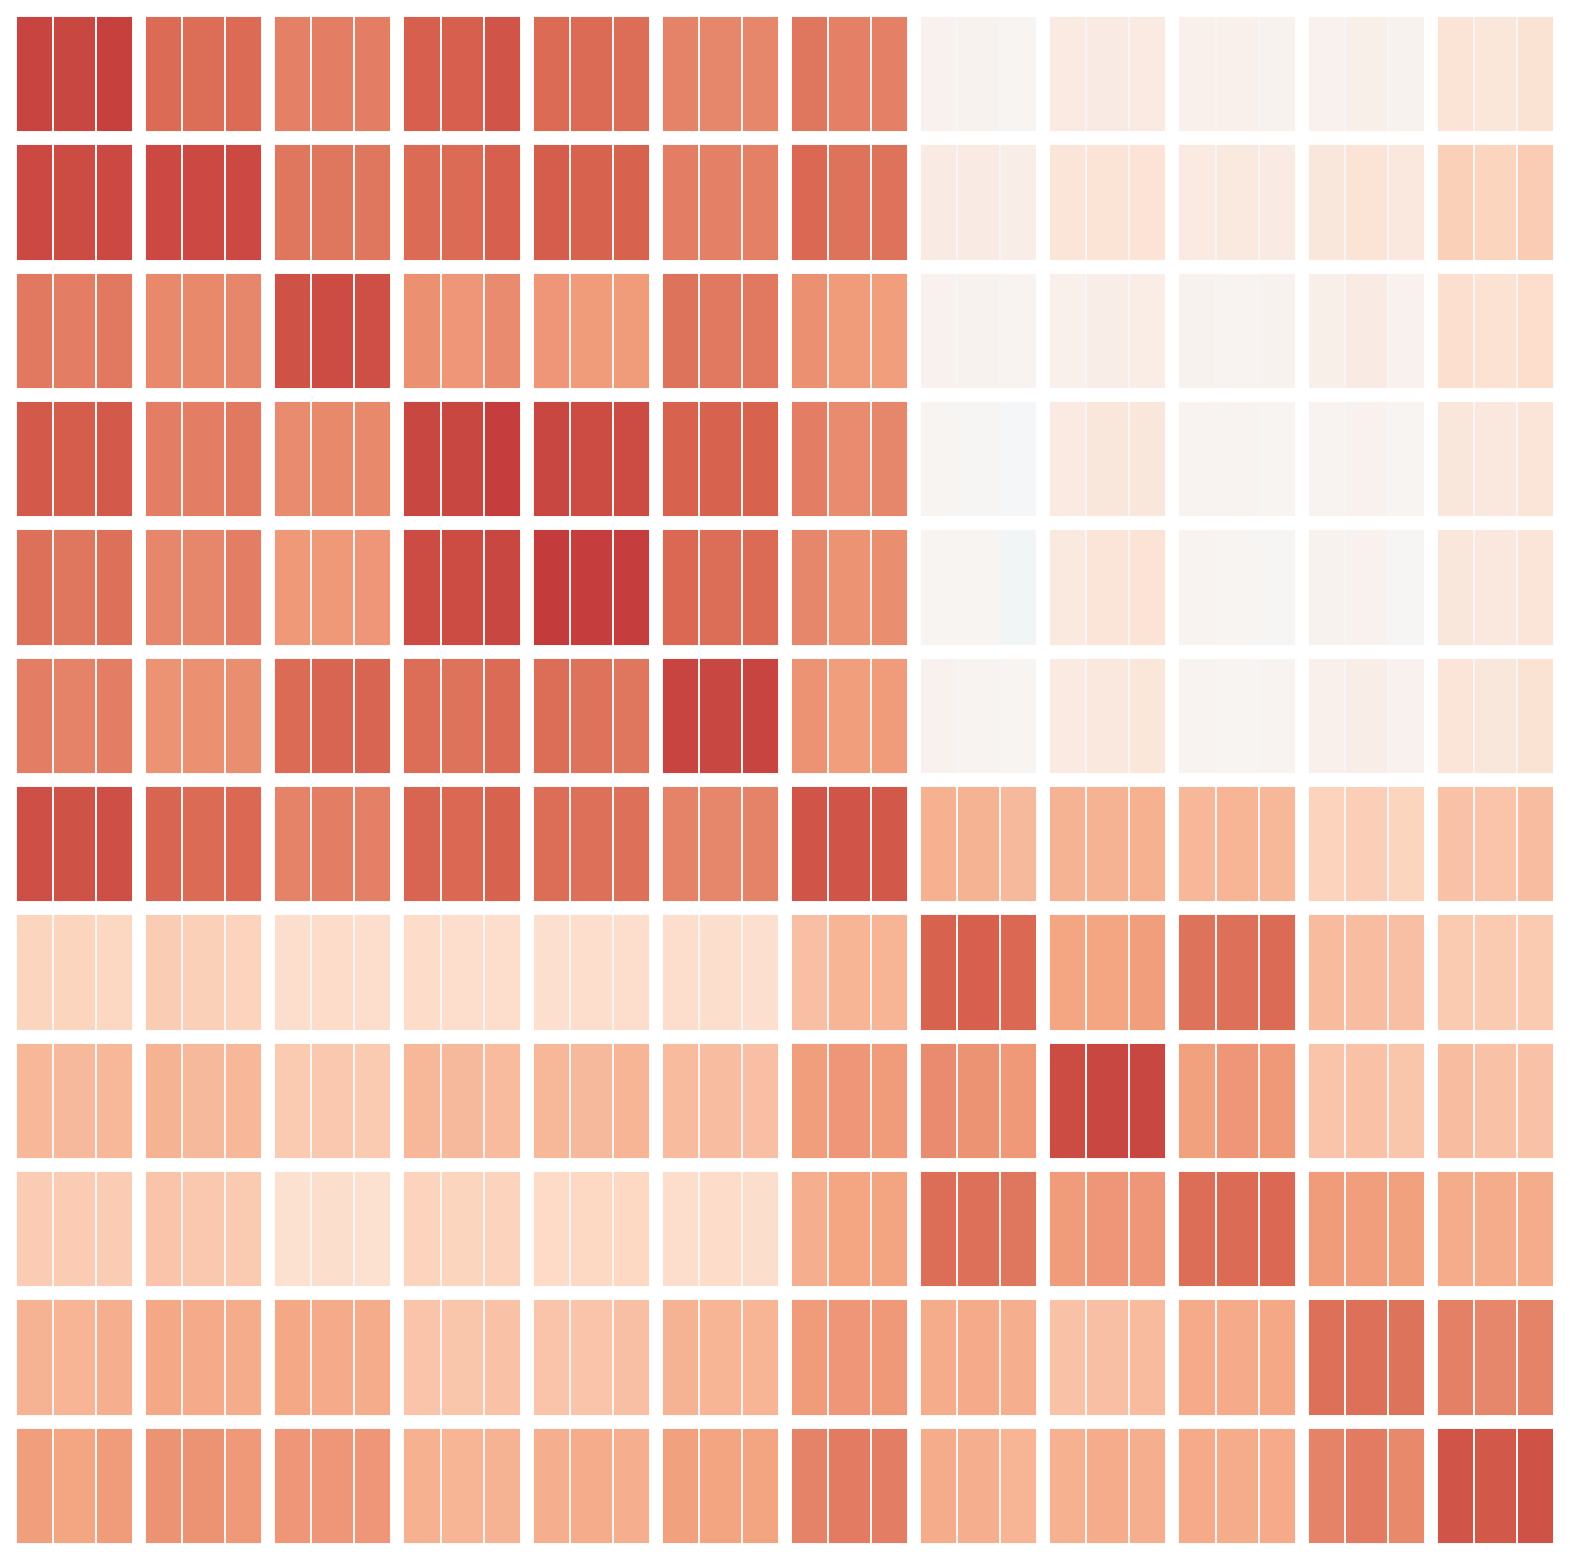

WTC


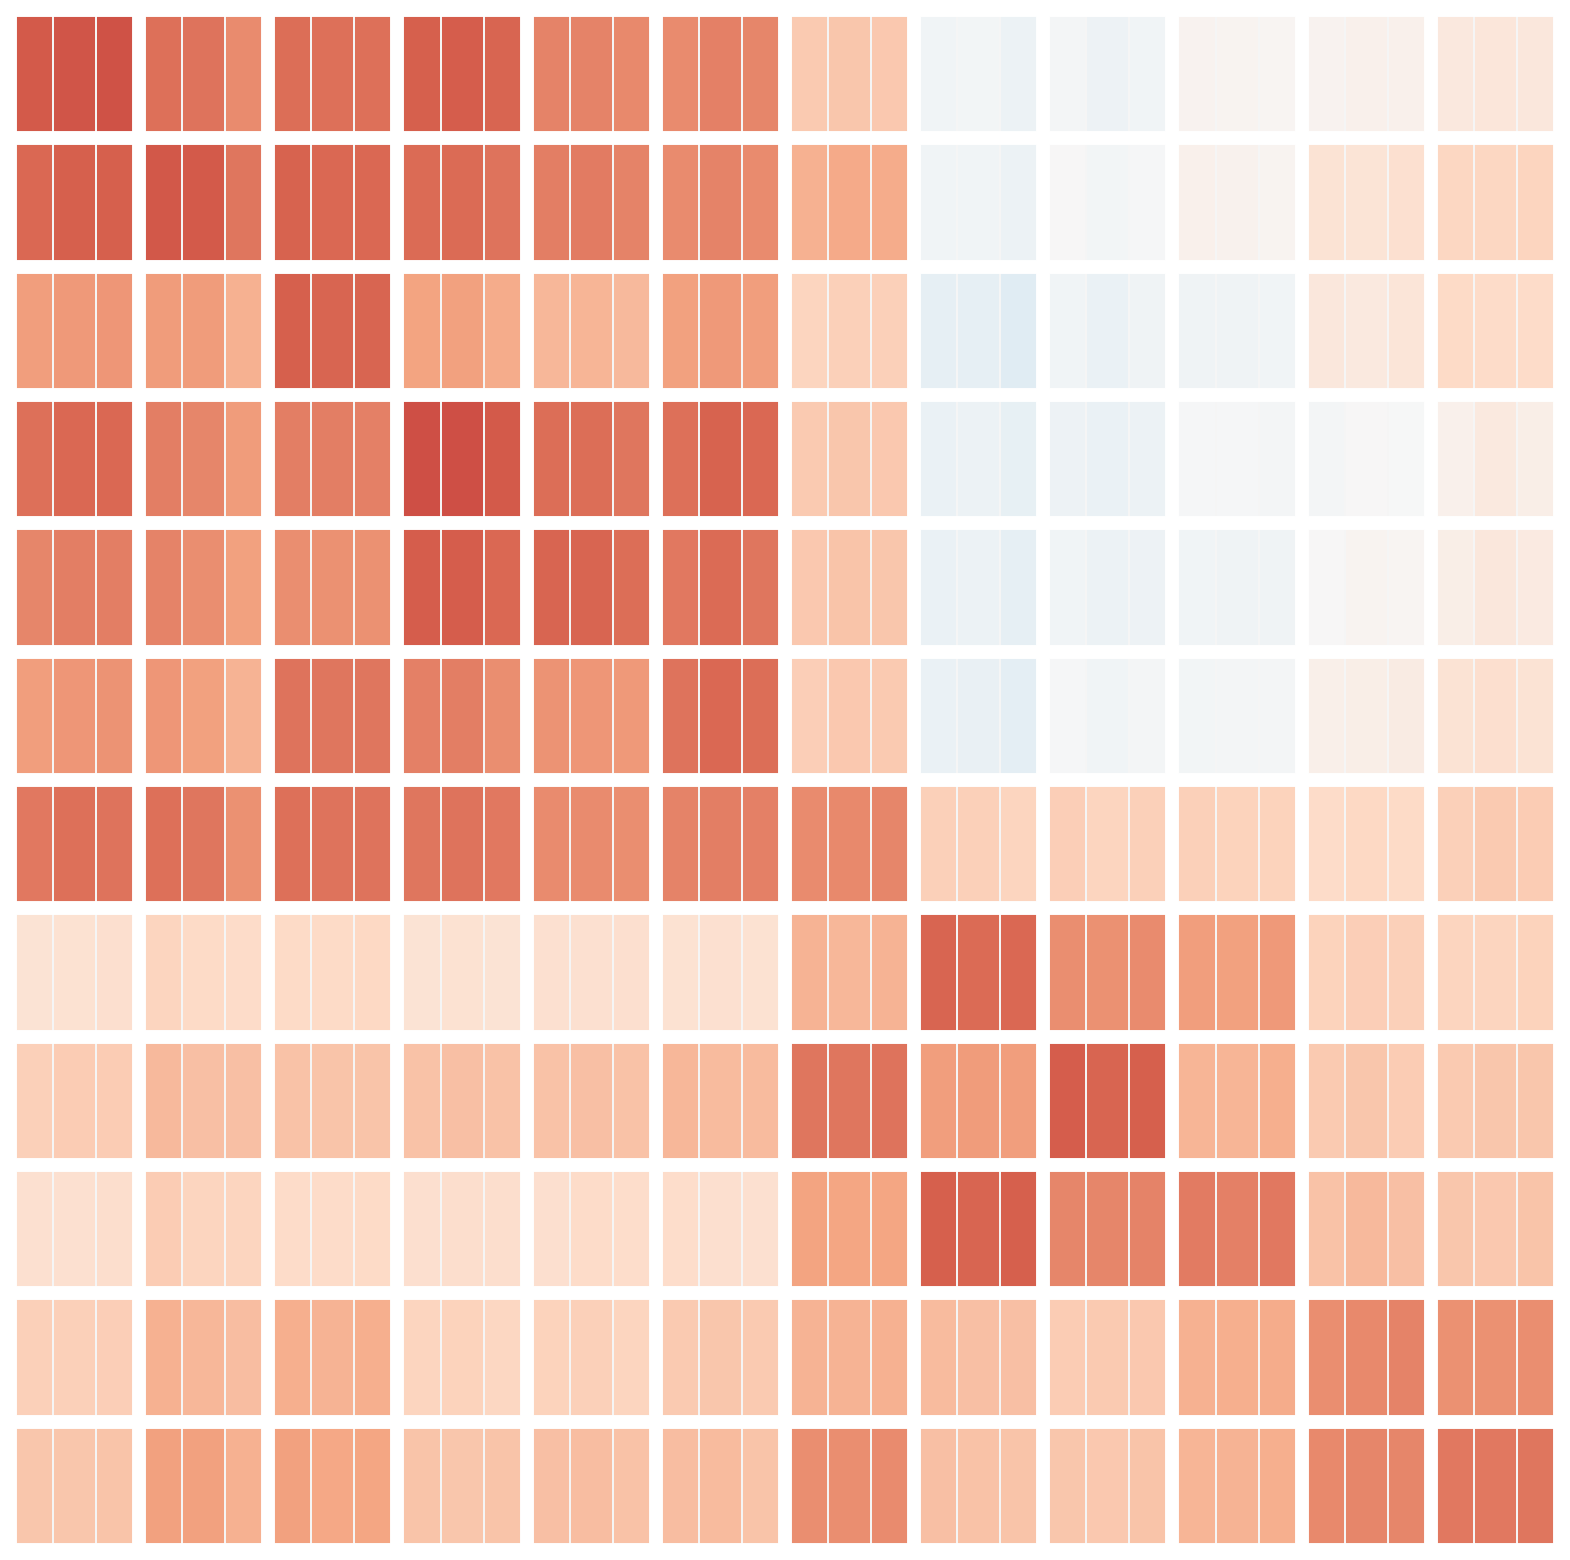

single_cell


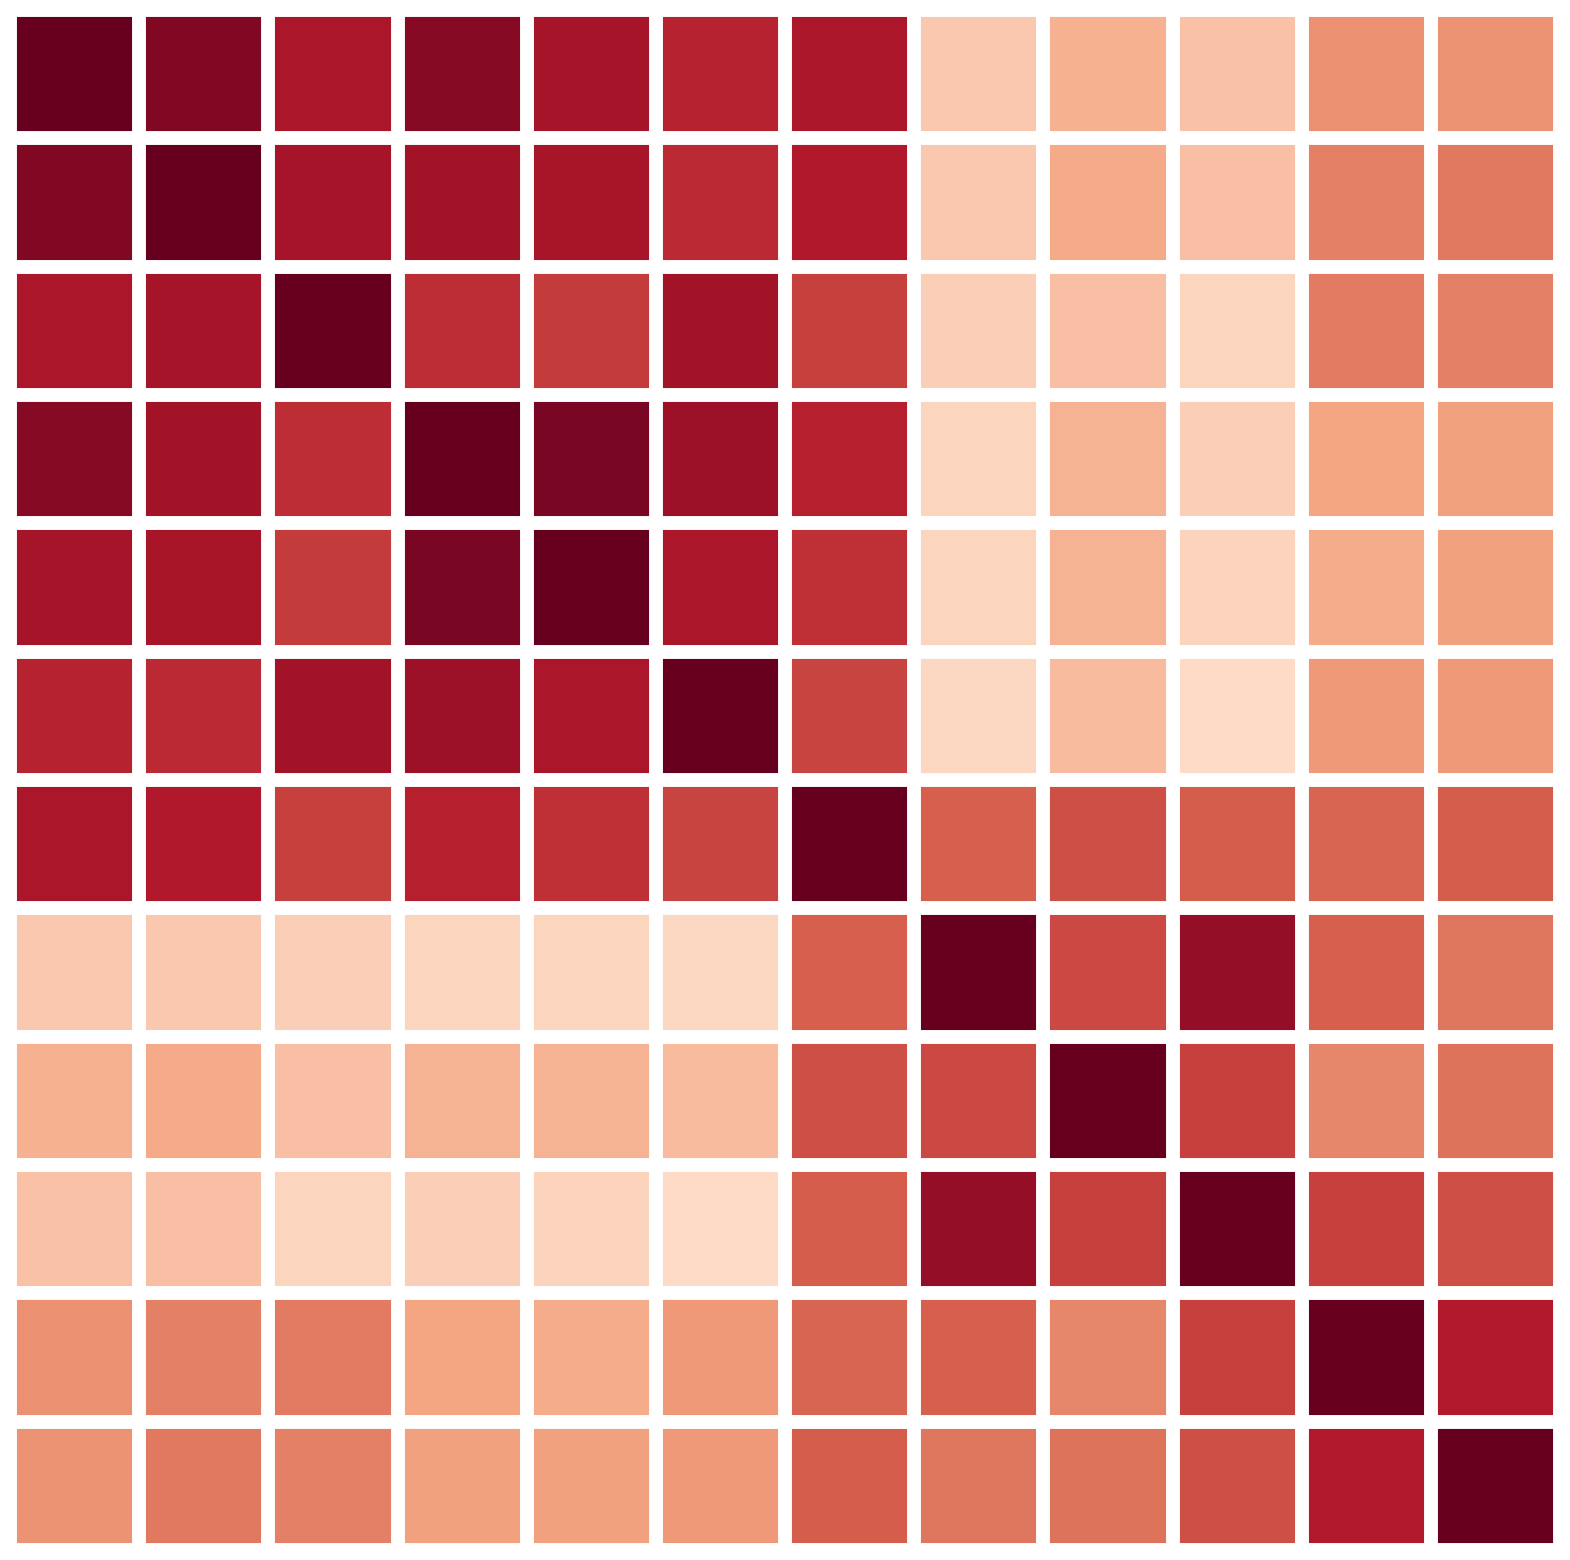

In [73]:
for genotype in list(set(meta_sorted['genotype'])):
    print(genotype)
    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    sc_samples = list(meta_sorted.loc[meta_sorted['genotype']=='single_cell'].index)

    genotype_samples_comb = genotype_samples + sc_samples
    vsd_plot_samples = vsd.loc[all_markers_plot,genotype_samples_comb]
    vsd_plot_sc = vsd.loc[all_markers_plot,sc_samples]

    data_plot = vsd_plot_samples.corr(method='spearman').loc[sc_samples,genotype_samples]
    data_plot.index = list(cond_combined.loc[data_plot.index,'condition'])

    data_plot = data_plot.drop_duplicates()
    data_plot = data_plot.T.drop_duplicates()
    data_plot = data_plot.T

    # Create the heatmap
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(data_plot, 
                vmin=-1, vmax=1, cmap='RdBu_r',cbar=False,
                ax=ax,linewidths=0.003, linecolor='whitesmoke',rasterized=False)
    
    # Get the number of rows and columns in the heatmap
    n_rows, n_cols = data_plot.shape

    white_break_size = 10
    # Add white lines every 3rd column (vertical lines)
    if genotype in ['SC102A1', '409B2', 'WTC']:
        for x in range(0, n_cols+1, 3):
            ax.axvline(x=x, color='white', linewidth=white_break_size)
    else:
        for x in range(-1, n_cols+1):
            ax.axvline(x=x, color='white', linewidth=white_break_size)

        
    # Add white lines every 1st row (horizontal lines)
    for y in range(-1, n_rows+1):
        ax.axhline(y=y, color='white', linewidth=white_break_size)
    
    plt.xticks([])
    plt.yticks([])
    # Turn spines off and create white grid.
    plt.savefig("figures/reproducibility_"+genotype+"_correlogram_with_screen_split.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/reproducibility_"+genotype+"_correlogram_with_screen_split.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()

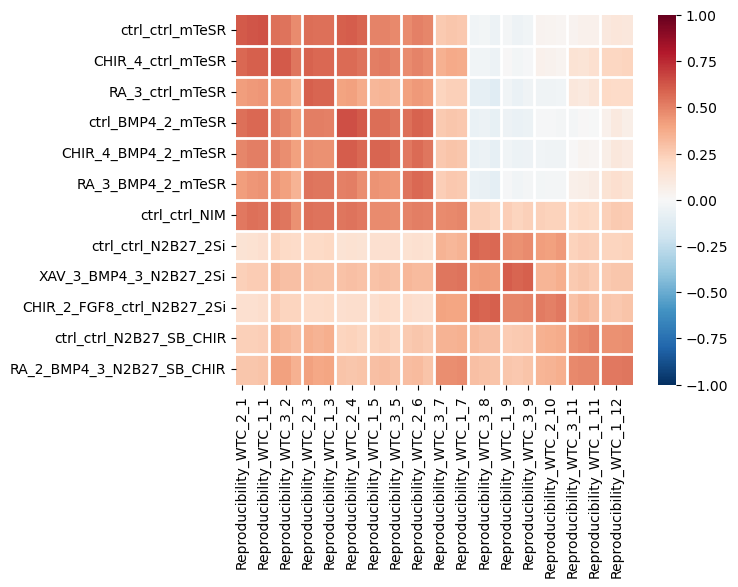

In [37]:
data_plot

Reproducibility_WTC_2_1  Reproducibility_WTC_3_1  \
ctrl_ctrl_mTeSR                            0.615875                 0.632767   
CHIR_4_ctrl_mTeSR                          0.575211                 0.595081   
RA_3_ctrl_mTeSR                            0.414350                 0.432877   
ctrl_BMP4_2_mTeSR                          0.549563                 0.571166   
CHIR_4_BMP4_2_mTeSR                        0.488940                 0.509017   
RA_3_BMP4_2_mTeSR                          0.418007                 0.443898   
ctrl_ctrl_NIM                              0.527844                 0.548211   
ctrl_ctrl_N2B27_2Si                        0.142206                 0.154032   
XAV_3_BMP4_3_N2B27_2Si                     0.236453                 0.254184   
CHIR_2_FGF8_ctrl_N2B27_2Si                 0.161597                 0.163143   
ctrl_ctrl_N2B27_SB_CHIR                    0.240448                 0.240671   
RA_2_BMP4_3_N2B27_SB_CHIR                  0.276817                 0.280216   

                            Reproducibility_WTC_1_1  Reproducibility_WTC_2_2  \
ctrl_ctrl_mTeSR                            0.637513                 0.547445   
CHIR_4_ctrl_mTeSR                          0.594991                 0.622290   
RA_3_ctrl_mTeSR                            0.441791                 0.428184   
ctrl_BMP4_2_mTeSR                          0.571174                 0.510237   
CHIR_4_BMP4_2_mTeSR                        0.510687                 0.492303   
RA_3_BMP4_2_mTeSR                          0.449767                 0.444180   
ctrl_ctrl_NIM                              0.542936                 0.547893   
ctrl_ctrl_N2B27_2Si                        0.164601                 0.221935   
XAV_3_BMP4_3_N2B27_2Si                     0.254490                 0.320579   
CHIR_2_FGF8_ctrl_N2B27_2Si                 0.175616                 0.256699   
ctrl_ctrl_N2B27_SB_CHIR                    0.249897                 0.356956   
RA_2_BMP4_3_N2B27_SB_CHIR                  0.282466                 0.412958   

                            Reproducibility_WTC_3_2  Reproducibility_WTC_1_2  \
ctrl_ctrl_mTeSR                            0.545705                 0.475215   
CHIR_4_ctrl_mTeSR                          0.611664                 0.534788   
RA_3_ctrl_mTeSR                            0.426930                 0.359321   
ctrl_BMP4_2_mTeSR                          0.485012                 0.427943   
CHIR_4_BMP4_2_mTeSR                        0.466260                 0.410183   
RA_3_BMP4_2_mTeSR                          0.410404                 0.348736   
ctrl_ctrl_NIM                              0.532165                 0.458365   
ctrl_ctrl_N2B27_2Si                        0.197402                 0.187649   
XAV_3_BMP4_3_N2B27_2Si                     0.301348                 0.302895   
CHIR_2_FGF8_ctrl_N2B27_2Si                 0.224424                 0.224880   
ctrl_ctrl_N2B27_SB_CHIR                    0.335082                 0.312051   
RA_2_BMP4_3_N2B27_SB_CHIR                  0.406568                 0.358517   

                            Reproducibility_WTC_2_3  Reproducibility_WTC_3_3  \
ctrl_ctrl_mTeSR                            0.560428                 0.552700   
CHIR_4_ctrl_mTeSR                          0.587161                 0.570652   
RA_3_ctrl_mTeSR                            0.598538                 0.583686   
ctrl_BMP4_2_mTeSR                          0.513146                 0.510673   
CHIR_4_BMP4_2_mTeSR                        0.467516                 0.456413   
RA_3_BMP4_2_mTeSR                          0.542788                 0.536273   
ctrl_ctrl_NIM                              0.548895                 0.542866   
ctrl_ctrl_N2B27_2Si                        0.200945                 0.198342   
XAV_3_BMP4_3_N2B27_2Si                     0.290779                 0.281877   
CHIR_2_FGF8_ctrl_N2B27_2Si                 0.193100                 0.190144   
ctrl_ctrl_N2B27_SB_CHIR  

WTC


<Axes: >

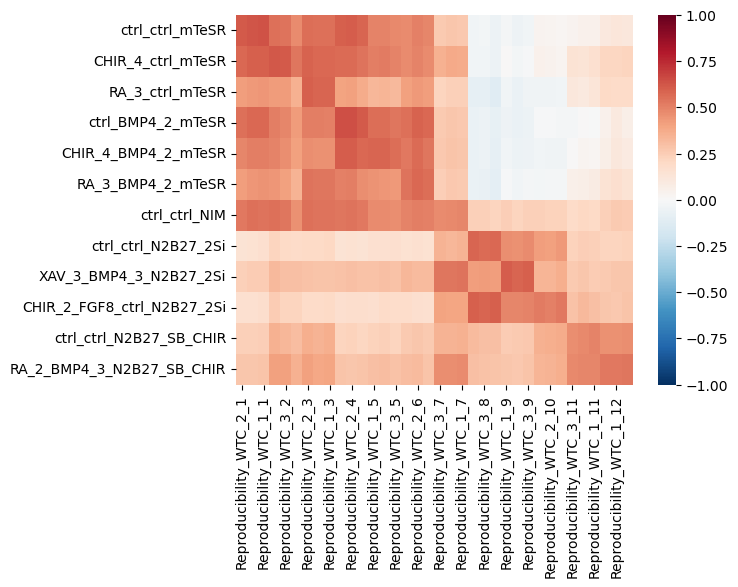

In [34]:
genotype = 'WTC'
print(genotype)
genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
sc_samples = list(meta_sorted.loc[meta_sorted['genotype']=='single_cell'].index)

genotype_samples_comb = genotype_samples + sc_samples
vsd_plot_samples = vsd.loc[all_markers_plot,genotype_samples_comb]
vsd_plot_sc = vsd.loc[all_markers_plot,sc_samples]

data_plot = vsd_plot_samples.corr(method='spearman').loc[sc_samples,genotype_samples]
data_plot.index = list(cond_combined.loc[data_plot.index,'condition'])
fig,ax = plt.subplots()
sns.heatmap(data_plot,cmap='RdBu_r',vmin=-1,vmax=1,ax=ax)


SC102A1


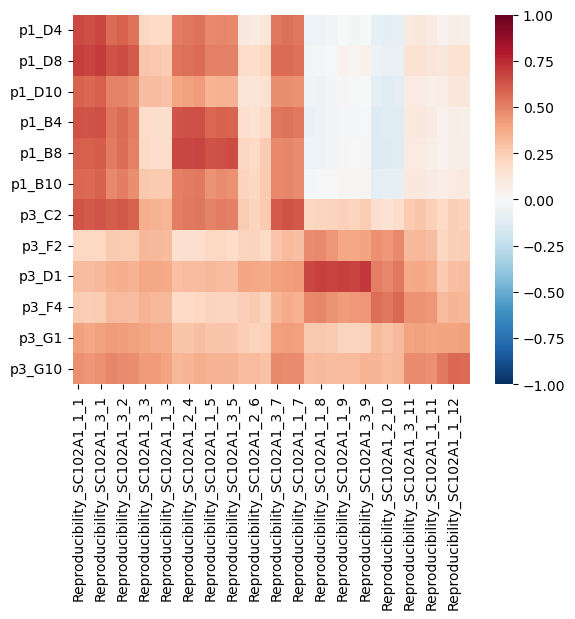

409B2


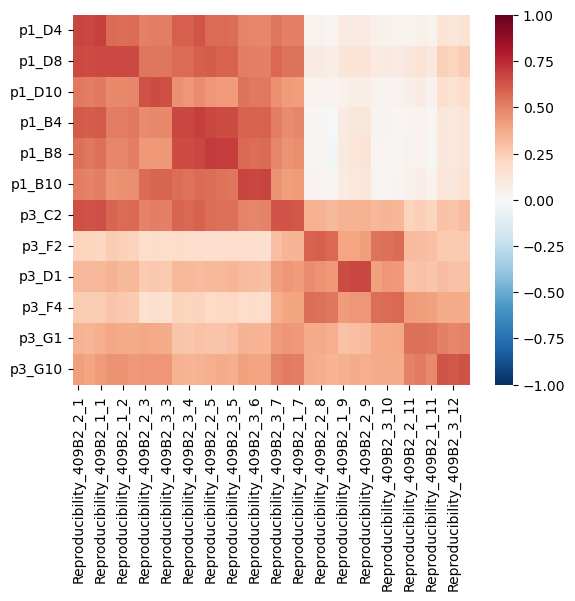

WTC


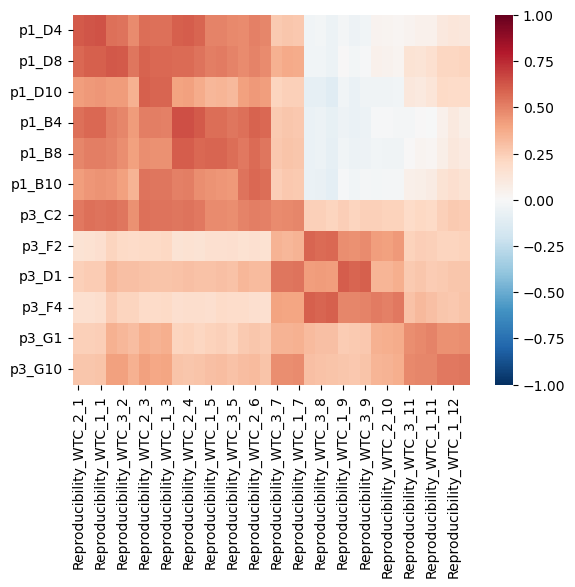

single_cell


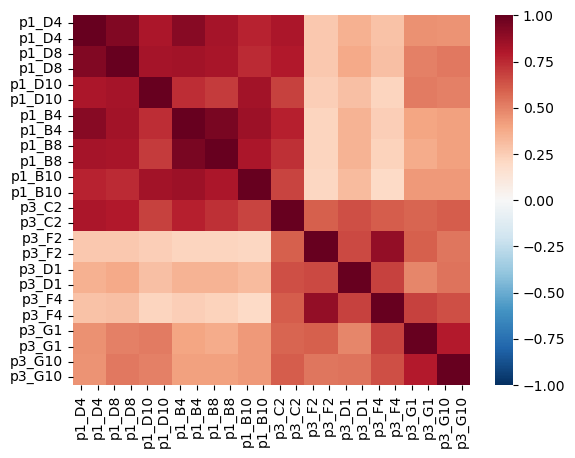

In [91]:
for genotype in list(set(meta_sorted['genotype'])):
    print(genotype)
    genotype_samples = list(meta_sorted.loc[meta_sorted['genotype']==genotype].index)
    sc_samples = list(meta_sorted.loc[meta_sorted['genotype']=='single_cell'].index)

    genotype_samples_comb = genotype_samples + sc_samples
    vsd_plot_samples = vsd.loc[all_markers_plot,genotype_samples_comb]
    vsd_plot_sc = vsd.loc[all_markers_plot,sc_samples]

    data_plot = vsd_plot_samples.corr(method='spearman').loc[sc_samples,genotype_samples]

    fig,ax = plt.subplots()
    sns.heatmap(data_plot,cmap='RdBu_r',vmin=-1,vmax=1,ax=ax)
    # Turn spines off and create white grid.
    plt.show()
    plt.close()

In [ ]:
empty_space = 0.7
height_ratios = [2, #dendrogram 0,
                0.5, #time
                 empty_space,
                5, #heatmap1
                 empty_space,
                5, #heatmap 2
                 empty_space,
                5 #heatmap 3
                ]


white_axes = [2,4,6]
    
fig, axs = plt.subplots(len(height_ratios), 1, figsize=(45, 30), gridspec_kw={'height_ratios': height_ratios,
                                                           'hspace':0
                                                           })

# Dendrogram
ax_annotation = axs[0]
qualheatmap(bmeta.loc[sorted_samples_bulk,morphogens_summary].T,color_dict=color_dict,ax_heatmap=ax_annotation)
#ax_annotation.set_title('Annotation')
ax_annotation.set_xticks([])
#ax_annotation.set_yticks([])
ax_annotation.set_xticklabels([])
#ax_annotation.set_yticklabels([])

ax_timemap = axs[1]
sns.heatmap(bmeta.loc[bmeta.index,['t_int','t_int']].T,vmax=42,vmin=10,cmap='Greys',cbar=False,ax=ax_timemap)

# Heatmap 3
sc_markers_all_plot = [x for x in sc_markers_all if x not in time_genes]
sc_markers_all_plot = [x for x in sc_markers_all_plot if x not in stable_markers]

ax_heatmap1 = axs[3]
vsd_plot = vsd.loc[stable_markers,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap1)
#ax_do.set_title('GO Disease')
ax_heatmap1.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap1.set_xticklabels([])
#ax_do.set_yticklabels([])


# Heatmap 3
ax_heatmap2 = axs[5]
vsd_plot = vsd.loc[time_genes,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap2)
#ax_do.set_title('GO Disease')
ax_heatmap2.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap2.set_xticklabels([])
#ax_do.set_yticklabels([])

# Heatmap 3
ax_heatmap3 = axs[7]
vsd_plot = vsd.loc[sc_markers_all_plot,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap3)
#ax_do.set_title('GO Disease')
ax_heatmap3.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap3.set_xticklabels([])
#ax_do.set_yticklabels([])

for ax_white_nr in white_axes:
    ax_white = axs[ax_white_nr]
    ax_white.set_xticks([])
    ax_white.set_yticks([])
    ax_white.set_xticklabels([])
    ax_white.set_yticklabels([])
    sns.despine(left=True,bottom=True,ax=ax_white)

plt.savefig("stability_plots/qual_heatmap_markers_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [74]:
vsd_plot_samples.corrwith(vsd_plot_sc)

Reproducibility_SC102A1_1_1  Reproducibility_SC102A1_2_1  \
DAB1                                6.423460                     6.636182   
CNTNAP4                             5.694832                     5.746637   
RMST                                6.235646                     6.108468   
SGCZ                                4.729777                     4.919419   
LRP1B                               6.054887                     6.159583   
...                                      ...                          ...   
THSD7B                              6.957503                     7.163736   
AKAP6                               9.978118                    10.055592   
THSD7A                              8.424621                     8.809144   
ENSG00000283982                     5.932280                     6.027642   
DST                                10.321010                    10.700888   

                 Reproducibility_SC102A1_3_1  Reproducibility_SC102A1_1_2  \
DAB1                                6.684621                     6.549708   
CNTNAP4                             5.461250                     5.025520   
RMST                                6.217234                     5.395856   
SGCZ                                4.900457                     4.955515   
LRP1B                               5.813939                     5.876086   
...                                      ...                          ...   
THSD7B                              6.917778                     7.846018   
AKAP6                               9.903740                     9.456364   
THSD7A                              8.494210                     7.591751   
ENSG00000283982                     5.863296                     5.592594   
DST                                10.425976                    10.084766   

                 Reproducibility_SC102A1_3_2  Reproducibility_SC102A1_2_2  \
DAB1                                6.858331                     6.651420   
CNTNAP4                             4.833265                     4.983560   
RMST                                6.013716                     5.662592   
SGCZ                                5.320076                     5.636388   
LRP1B                               5.571519                     5.464111   
...                                      ...                          ...   
THSD7B                              7.948353                     7.861846   
AKAP6                               9.401500                     9.556071   
THSD7A                              7.733765                     7.886256   
ENSG00000283982                     5.876033                     5.830686   
DST                                 9.904609                    10.306718   

                 Reproducibility_SC102A1_3_3  Reproducibility_SC102A1_2_3  \
DAB1                                5.605349                     5.423296   
CNTNAP4                             4.686877                     4.676052   
RMST                                6.023946                     5.551968   
SGCZ                                4.203121                     4.203121   
LRP1B                               5.675353                     5.527484   
...                                      ...                          ...   
THSD7B                              6.166579                     6.051813   
AKAP6                               8.516484                     8.707831   
THSD7A                              6.877370                     6.785522   
ENSG00000283982                     5.265726                     5.450361   
DST                                 9.279870                     9.489257   

                 Reproducibility_SC102A1_1_3  Reproducibility_SC102A1_1_4  \
DAB1                                5.655514                     5.977339   
CNTNAP4                             4.569458                     5.304564   
RMST                                5.694270                     7.132747   
SGCZ     

In [73]:
vsd_plot_samples.corrwith(vsd_plot_sc)

Reproducibility_SC102A1_1_1    NaN
Reproducibility_SC102A1_1_10   NaN
Reproducibility_SC102A1_1_11   NaN
Reproducibility_SC102A1_1_12   NaN
Reproducibility_SC102A1_1_2    NaN
Reproducibility_SC102A1_1_3    NaN
Reproducibility_SC102A1_1_4    NaN
Reproducibility_SC102A1_1_5    NaN
Reproducibility_SC102A1_1_6    NaN
Reproducibility_SC102A1_1_7    NaN
Reproducibility_SC102A1_1_8    NaN
Reproducibility_SC102A1_1_9    NaN
Reproducibility_SC102A1_2_1    NaN
Reproducibility_SC102A1_2_10   NaN
Reproducibility_SC102A1_2_11   NaN
Reproducibility_SC102A1_2_12   NaN
Reproducibility_SC102A1_2_2    NaN
Reproducibility_SC102A1_2_3    NaN
Reproducibility_SC102A1_2_4    NaN
Reproducibility_SC102A1_2_5    NaN
Reproducibility_SC102A1_2_6    NaN
Reproducibility_SC102A1_2_7    NaN
Reproducibility_SC102A1_2_8    NaN
Reproducibility_SC102A1_2_9    NaN
Reproducibility_SC102A1_3_1    NaN
Reproducibility_SC102A1_3_10   NaN
Reproducibility_SC102A1_3_11   NaN
Reproducibility_SC102A1_3_12   NaN
Reproducibility_SC10

In [65]:
vsd_plot

p1_D4      p1_D8     p1_D10      p1_B4      p1_B8  \
DAB1             12.800735  11.808133  10.831169  12.157447  10.715910   
CNTNAP4          11.161997   8.763100   7.994991   9.393858   7.083056   
RMST             12.142238   9.451971   9.146943  12.457980  11.618884   
SGCZ             11.578697   8.558109   8.270511   9.795612   7.954745   
LRP1B            13.065094  10.826812  11.352756  12.646543  11.603475   
...                    ...        ...        ...        ...        ...   
THSD7B           11.838849  13.058163  11.048988  12.122033  12.511476   
AKAP6            12.656135  12.519719  13.191600  12.736510  12.463530   
THSD7A           12.512445  11.596461  12.136437  12.300733  11.460735   
ENSG00000283982  10.996290  11.383292  11.735020  11.788482  11.429563   
DST              12.657810  12.362422  12.452120  12.854824  12.367698   

                    p1_B10      p3_C2      p3_F2      p3_D1      p3_F4  \
DAB1              9.835130  12.411505  11.305807  11.103091  11.409254   
CNTNAP4           6.809595   9.436421   6.623331   5.736266   6.296396   
RMST             10.832610  11.453159  11.187754  12.245796  12.998792   
SGCZ             12.268584   9.519150   7.758607   6.264999   6.626532   
LRP1B            10.866541  12.255105   8.981794   9.559301   8.805774   
...                    ...        ...        ...        ...        ...   
THSD7B            9.890771  12.766255   8.412225  10.504590  10.076426   
AKAP6            13.095600  12.123753   9.625201   9.813557  10.246594   
THSD7A           11.603838  11.764210   9.500627   9.072297   9.910602   
ENSG00000283982  11.663788  10.612893   8.475746   8.324122   9.041921   
DST              12.657145  12.337246  11.039032  11.289156  11.281018   

                     p3_G1     p3_G10  
DAB1              9.415615   9.948134  
CNTNAP4           6.015020   5.433427  
RMST             10.964509   9.227723  
SGCZ              6.361175   6.115980  
LRP1B             9.368315   8.731886  
...                    ...        ...  
THSD7B            9.864387  12.262884  
AKAP6            11.035859  11.442151  
THSD7A           11.276102  11.409267  
ENSG00000283982   9.800083  10.919792  
DST              11.704380  12.149411  

[360 rows x 12 columns]

<Axes: >

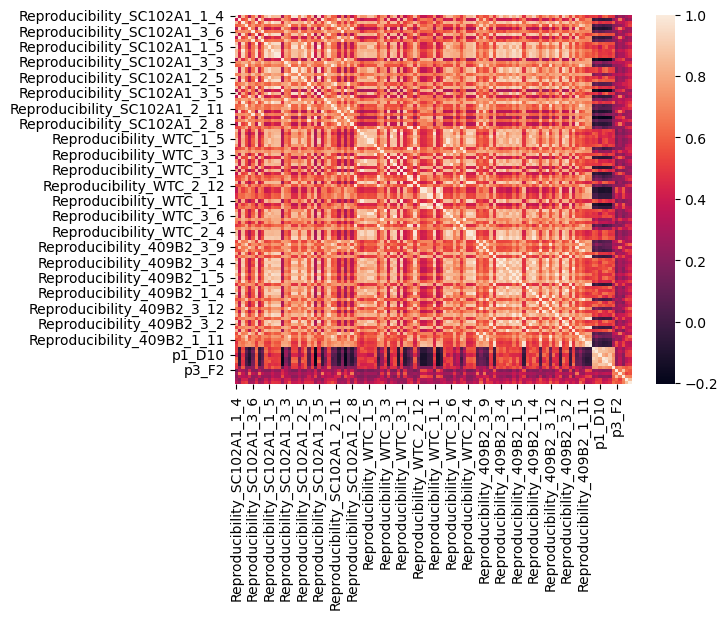

In [62]:
sns.heatmap(vsd.loc[sample_markers_all].corr())

/links/groups/treutlein/USERS/jjans/mambaforge/envs/py_jjans_3.10_ML/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/links/groups/treutlein/USERS/jjans/mambaforge/envs/py_jjans_3.10_ML/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


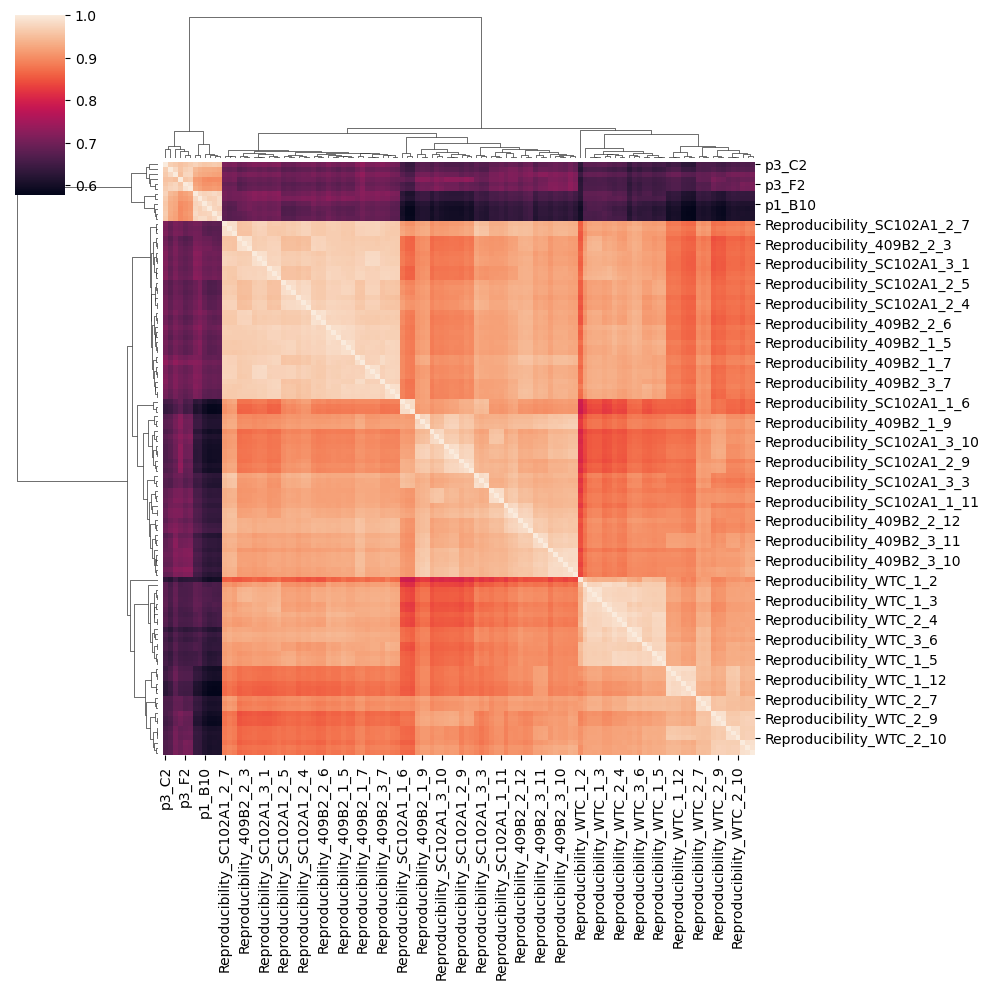

In [59]:
sns.clustermap(vsd.corr())

In [93]:
sc_meta_post_p.columns

Index(['sample', 'species', 'gene_count', 'tscp_count', 'mread_count',
       'bc1_well', 'bc2_well', 'bc3_well', 'bc1_wind', 'bc2_wind', 'bc3_wind',
       'plateID', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'n_genes', 'percent_mito', 'n_counts', 'outlier', 'mt_outlier',
       'doublet_score', 'predicted_doublet', 'leiden_4', 'leiden_10',
       'merged_clusters_from_10', 'parse_id', 'AP_axis', 'DV_axis',
       'Basal_media', 'final_clustering', 'CycA', 'M_XAV', 'M_CHIR', 'M_RA',
       'M_FGF8', 'M_BMP4', 'M_SHH', 'M_PM', 'tSNE_1', 'tSNE_2', 'umap_1',
       'umap_2'],
      dtype='object')

In [96]:
samples

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [98]:
sample2morph = {}
for sample in samples:
    sample_ID = sample2ID[sample]
    if 'p1' in sample_ID:
        sc_meta_post_p = sc_meta_post.loc[sc_meta_post['parse_id']==sample_ID]
        morph_sample = sc_meta_post_p['Basal_media'][0]+"_"+sc_meta_post_p['DV_axis'][0]+"_"+sc_meta_post_p['AP_axis'][0]
        sample2morph[sample_ID]=morph_sample
    if 'p3' in sample_ID:
        sc_meta_pre_p = sc_meta_pre.loc[sc_meta_pre['parse_id']==sample_ID]
        morph_sample = sc_meta_pre_p['Basal_media'][0]+"_"+sc_meta_pre_p['DV_axis'][0]+"_"+sc_meta_pre_p['AP_axis'][0]
        sample2morph[sample_ID]=morph_sample

/tmp/ipykernel_55473/237966966.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  morph_sample = sc_meta_post_p['Basal_media'][0]+"_"+sc_meta_post_p['DV_axis'][0]+"_"+sc_meta_post_p['AP_axis'][0]
/tmp/ipykernel_55473/237966966.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  morph_sample = sc_meta_pre_p['Basal_media'][0]+"_"+sc_meta_pre_p['DV_axis'][0]+"_"+sc_meta_pre_p['AP_axis'][0]


In [56]:
sc_meta_pre_p = sc_meta_pre.loc[sc_meta_pre['parse_id']=='p1_D4']
morphogens = ['XAV','CHIR','RA','BMP4','SHH','FGF8']
morphogens = ['M_'+x for x in morphogens]
sc_meta_pre_p[morphogens].mean()

M_XAV    NaN
M_CHIR   NaN
M_RA     NaN
M_BMP4   NaN
M_SHH    NaN
M_FGF8   NaN
dtype: float64

M_XAV      0.0
M_CHIR     0.0
M_RA      10.0
M_BMP4    50.0
M_SHH      0.0
M_FGF8     0.0
dtype: float64

In [99]:
sample2morph

{'p1_D4': 'mTeSR_ctrl_ctrl',
 'p1_D8': 'mTeSR_ctrl_CHIR_4',
 'p1_D10': 'mTeSR_ctrl_RA_3',
 'p1_B4': 'mTeSR_BMP4_2_ctrl',
 'p1_B8': 'mTeSR_BMP4_2_CHIR_4',
 'p1_B10': 'mTeSR_BMP4_2_RA_3',
 'p3_C2': 'NIM_ctrl_ctrl',
 'p3_F2': 'N2B27_2Si_ctrl_ctrl',
 'p3_D1': 'N2B27_2Si_BMP4_3_XAV_3',
 'p3_F4': 'N2B27_2Si_ctrl_CHIR_2_FGF8',
 'p3_G1': 'N2B27_SB_CHIR_ctrl_ctrl',
 'p3_G10': 'N2B27_SB_CHIR_BMP4_3_RA_2'}

In [47]:
sc_meta_pre.loc[sc_meta_pre['parse_id']=='p3_G1']['DV_axis']

73_01_04__s1    ctrl
73_01_13__s1    ctrl
73_01_24__s1    ctrl
73_01_28__s1    ctrl
73_01_35__s1    ctrl
                ... 
73_95_78__s3    ctrl
73_95_80__s3    ctrl
73_95_84__s3    ctrl
73_95_87__s3    ctrl
73_95_93__s3    ctrl
Name: DV_axis, Length: 5761, dtype: object

In [22]:
vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()


NameError: name 'sample_markers_all' is not defined

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/dendrogram_colored_by_sample_heatmap_markers.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [ ]:
all_samples = dist_df.index
import re
all_samples = [re.sub(".*_","",x) for x in all_samples]

from collections import Counter
tmp = Counter(all_samples)
matching_samples = []
for x in tmp:
    if tmp[x]>1:
        matching_samples.append(x)

dist_matching = []
for sample1 in matching_samples:
    for sample2 in matching_samples:
        dm = dist_df.loc['iGlut_pre_'+sample1,'iGABA_pre_'+sample2]
        dist_matching.append(dict(sample1=sample1,sample2=sample2,d=dm))

dist_matching = pd.DataFrame(dist_matching)

dms = list(dist_matching.loc[dist_matching['sample1']==dist_matching['sample2'],'d'])
dds = list(dist_matching.loc[dist_matching['sample1']!=dist_matching['sample2'],'d'])

dist_matching.loc[dist_matching['sample1']==dist_matching['sample2'],'matching'] = 1
dist_matching.loc[dist_matching['sample1']!=dist_matching['sample2'],'matching'] = 0

import seaborn as sns
sns.boxplot(x='matching',y='d',data=dist_matching)